# <center>Ch1 医疗领域Embedding模型微调 </center>

# 背景 

人类语言丰富而微妙，要让机器理解文本，就必须将文字转换为数字。
#### 从困境到突破

早期NLP面临一个根本性问题：如何用数字表示文字？最初的解决方案——独热编码和词袋模型——虽然简单直接，但它们无法捕捉词语之间的语义关系，也无法处理"银行"可能是"金融机构"或"河岸"这样的多义现象。

转折点来自语言学家在1957年提出的一个观点："你可以通过一个词的伙伴来了解它"。这一思想启发研究者思考：如果相似上下文中出现的词语具有相似含义，那么我们能否构建一个系统来学习这种模式？

#### Word2Vec

2013年，Google的开发的Word2Vec模型首次证明，通过简单而高效的神经网络架构，可以将词语映射到密集向量空间，而这些向量保留了语义关系。

这一发现震惊了学术界——不仅因为它工作得很好，更因为这些向量展现出了令人惊叹的代数特性。"king - man + woman ≈ queen"这样的向量运算表明，模型真正捕捉到了某种语义结构。

#### 走向上下文与深度理解

尽管Word2Vec和随后出现的GloVe(2014)带来了重大进步，它们仍有一个根本局限：一个词只对应一个固定向量，无法理解上下文差异。

2018年，当BERT和类似模型引入了上下文敏感的动态embedding。这意味着"苹果"在"我吃了一个苹果"和"苹果公司发布新产品"中会有完全不同的向量表示，终于解决了一词多义的困境。



#### 驱动力量

是什么推动了embedding技术的快速发展？实际需求是最强大的催化剂：

- **搜索引擎**渴望理解查询背后的真实意图，而非仅仅匹配关键词
- **推荐系统**需要深入理解内容与用户，超越表面标签
- **对话系统**必须抓住句子的真实含义，而非停留在词汇层面

同时，硬件的进步（特别是GPU技术）和深度学习方法的成熟，为复杂embedding模型的训练创造了条件。

#### 今天的影响

现代embedding技术已经远超词向量的初始概念，发展为能表示句子、段落、甚至整个文档的强大工具。它们成为了几乎所有现代NLP系统的基础层，从智能客服到内容推荐，从情感分析到机器翻译。

embedding已经扩展到跨语言和多模态领域。今天，一个优秀的embedding系统可以将英文、中文、图像、音频映射到同一向量空间，使得跨模态理解和生成成为可能。

# 1. Embedding模型详解

Embedding模型是将文本、图像或其他形式的数据转换成密集的数值向量（通常是浮点数构成的多维数组）的机器学习模型。这些向量在高维空间中表示原始数据的语义特征，使得语义相似的内容在向量空间中彼此接近。

简单来说，embedding它的核心功能是将"难以直接计算"的数据（如文字、图片）转换成一组数字（向量）。

想象一下：
- 文字本身是人类能理解的符号，但计算机只懂数字
- Embedding模型就像一个翻译器，把"我喜欢苹果"这句话翻译成类似[-0.23, 0.45, 0.78, ..., 0.12]这样的一串数字

这个数字序列不是随意生成的，而是经过精心设计，使得：
- 意思相近的句子，转换后的数字也相似
- 例如："我爱苹果"和"我喜欢苹果"的向量会非常接近
- 而"我喜欢苹果"和"今天天气很好"的向量会相距较远

### 1.1 Embeddingg概念详解

#### 为什么要用数字表示文字？

计算机只能处理数字。当我们把文字变成数字后，计算机就能:
1. 计算文字之间的相似度
2. 对文字进行分类
3. 对文字进行搜索
4. 根据文字做出预测

#### 日常生活例子

#### 例子1: 智能手机相册
当你搜索"狗"时，手机能找出所有狗的照片，即使照片没有标签。这是因为手机把图片转成了embedding，然后把"狗"这个词也转成embedding，然后找相似的。

#### 例子2: 微信搜索
当你在微信搜索"晚饭"，它能找到包含"吃饭"、"晚餐"的聊天记录，即使没有"晚饭"这个确切词语。这是因为"晚饭"、"吃饭"、"晚餐"的embedding很接近。

#### 例子3: 输入法联想
当你打出"我想"，输入法会联想"我想你了"、"我想吃饭"。这是因为输入法学习了哪些词的embedding在"我想"之后经常出现。

#### Embedding模型的工作原理

1. **训练阶段**：
   - 模型阅读大量文本（如维基百科全文）
   - 学习词语、句子在不同上下文中如何使用
   - 根据"相似的词语在相似的上下文中出现"的原则建立数学表示

2. **使用阶段**：
   - 输入任何文本
   - 模型根据训练好的规则将其转换为向量
   - 可以计算不同文本间的相似度（通常用余弦相似度）

#### 详细应用场景举例

#### 1. 搜索引擎
**问题**: 如何找到与搜索词相关的网页，即使网页中没有完全相同的词？

**Embedding解决方案**:
1. 把用户搜索的"减肥方法"变成数字 → [0.1, 0.8, -0.2...]
2. 把所有网页内容也变成数字 → [0.2, 0.7, -0.3...], [0.8, 0.1, 0.5...]等
3. 找出数字最接近的网页，即使网页中用的是"瘦身技巧"而非"减肥方法"

#### 2. 内容推荐
**问题**: 看完一篇文章后，如何推荐用户可能感兴趣的其他文章？

**Embedding解决方案**:
1. 把当前阅读的文章"如何养猫"变成数字 → [0.7, 0.2, -0.4...]
2. 把其他所有文章也变成数字
3. 找出数字最接近的文章，如"猫咪健康指南"，因为它们话题相似

#### 3. RAG系统（检索增强生成）详解
**问题**：大语言模型知识有限且固定，无法获取最新信息

**解决方案**：
1. 用户提问"2023年中国GDP增长了多少？"
2. **检索阶段**：
   - 将问题转为embedding向量
   - 在知识库中找出与问题向量最相似的文档向量（如最新经济报告）
3. **增强阶段**：
   - 将找到的文档作为上下文提供给语言模型
4. **生成阶段**：
   - 语言模型基于检索到的最新信息生成回答，而非使用训练时的旧数据

#### Embedding的技术细节

#### 1. 维度的意义
- 低维embedding（如50维）：捕捉简单关系，计算快但精度低
- 高维embedding（如1536维）：捕捉复杂语义，更精确但需更多计算资源
- 每个维度可能代表一种抽象的语义特征，如"正式程度"、"技术相关性"等

#### 2. 常见距离计算方法
- **余弦相似度**：衡量方向相似性，忽略大小（最常用）
  - 公式：cos(θ) = (A·B)/(|A|·|B|)
  - 范围：-1（完全相反）到1（完全相同）
- **欧几里得距离**：衡量直线距离
- **点积**：简单但受向量长度影响

#### 为什么Embedding模型如此重要？

1. **桥接语义与计算**：把人类理解的语义转为机器可计算的数值
2. **信息压缩**：将复杂的数据浓缩为固定长度的向量
3. **通用表示**：为各类AI任务提供统一的输入格式
4. **相似性计算**：使机器能够评估内容的语义相似度
5. **跨模态连接**：可以将文字、图像等不同类型数据映射到同一空间

总之，embedding模型是现代AI系统的基础设施，它让计算机能够"理解"和处理人类语言、图像等复杂数据的含义，而不仅仅是表面的符号。

#### 总结

1. Embedding就是把文字、图片等信息变成一串数字
2. 相似的东西会得到相似的数字
3. 有了这些数字，计算机就能理解内容的相似性
4. 这让搜索、推荐、理解等AI功能成为可能

这就像给每个词语、图片、声音分配了一个精确的"坐标"，让计算机能在这个意义的"地图"上导航，理解什么离什么更近，什么和什么更相关。

### 1.2 Embedding维度递进

#### onehot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义我们的词汇表
vocabulary = ["男孩","女孩"]

# 创建每个词的one-hot编码
onehot_encodings = {}
for i, word in enumerate(vocabulary):
    encoding = np.zeros(len(vocabulary))
    encoding[i] = 1
    onehot_encodings[word] = encoding

# 打印每个词的one-hot编码
for word, encoding in onehot_encodings.items():
    print(f"{word}: {encoding}")

男孩: [1. 0.]
女孩: [0. 1.]


#### 为什么要从One-hot变成多维坐标？

想象一下，如果我们用One-hot编码表示词语：

```json
男孩 = [1,0,0,0,0,0]
女孩 = [0,1,0,0,0,0]
男人 = [0,0,1,0,0,0]
女人 = [0,0,0,1,0,0]
国王 = [0,0,0,0,1,0]
王后 = [0,0,0,0,0,1]
```

在这种表示下：
- 所有词语之间的距离都是相等的
- 计算机无法知道"男孩"和"男人"比"男孩"和"王后"更相似
- 每增加一个词，就要增加一个维度

#### 二维展示

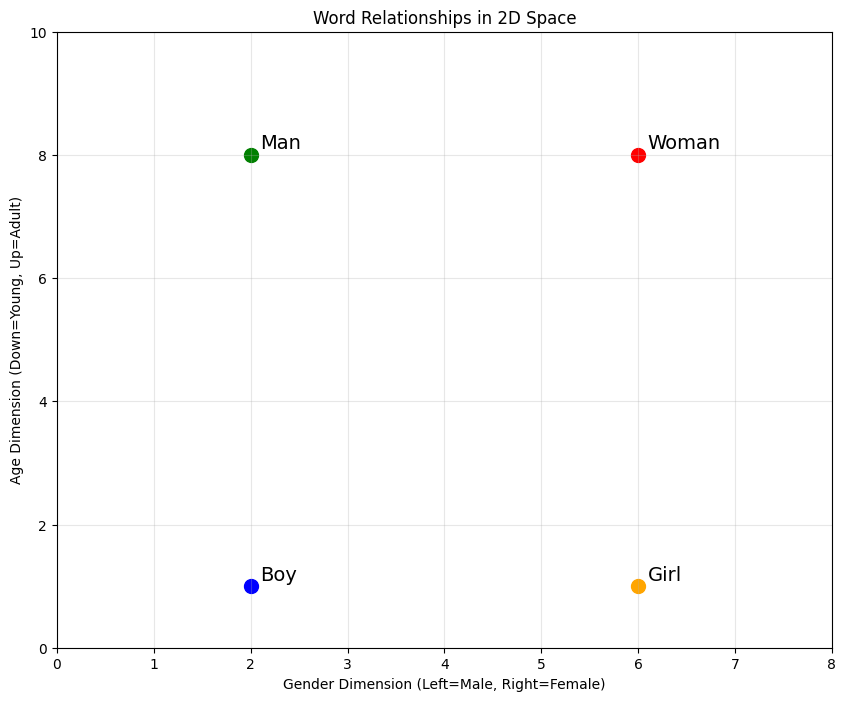

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 创建坐标点
coords = {
    "male_child": np.array([2, 1]),   # 男孩
    "female_child": np.array([6, 1]), # 女孩
    "male_adult": np.array([2, 8]),   # 男人
    "female_adult": np.array([6, 8])  # 女人
}

# 绘制二维点图
plt.figure(figsize=(10, 8))

# 分别绘制每个点，并使用英文标注
labels = {"male_child": "Boy", "female_child": "Girl", 
          "male_adult": "Man", "female_adult": "Woman"}

colors = {"male_child": "blue", "female_child": "orange", 
          "male_adult": "green", "female_adult": "red"}

for key, coord in coords.items():
    plt.scatter(coord[0], coord[1], color=colors[key], s=100)
    plt.text(coord[0] + 0.1, coord[1] + 0.1, labels[key], fontsize=14)

# 设置图表属性
plt.xlabel("Gender Dimension (Left=Male, Right=Female)")
plt.ylabel("Age Dimension (Down=Young, Up=Adult)")
plt.title("Word Relationships in 2D Space")
plt.grid(True, alpha=0.3)

# 设置坐标轴范围
plt.xlim(0, 8)
plt.ylim(0, 10)

plt.show()

#### 二维坐标的优势

当我们使用二维坐标表示：
```
男孩 = [2, 1]
女孩 = [6, 1]
男人 = [2, 8]
女人 = [6, 8]
```

突然间，计算机可以"理解"：
1. 在第一个维度（X轴）上，2表示"男性"，6表示"女性"
2. 在第二个维度（Y轴）上，1表示"年轻"，8表示"年长"

这就让计算机可以发现：
- "男孩"和"女孩"很相似（都是年轻人）
- "男人"和"男孩"很相似（都是男性）
- "男孩"和"女人"不太相似（性别不同，年龄不同）


#### 三维展示

/var/folders/2y/qljw9r9x1t96gzjmb6v9m5v00000gn/T/ipykernel_48114/3179865878.py:43: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2y/qljw9r9x1t96gzjmb6v9m5v00000gn/T/ipykernel_48114/3179865878.py:43: UserWarning: Glyph 23401 (\N{CJK UNIFIED IDEOGRAPH-5B69}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2y/qljw9r9x1t96gzjmb6v9m5v00000gn/T/ipykernel_48114/3179865878.py:43: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2y/qljw9r9x1t96gzjmb6v9m5v00000gn/T/ipykernel_48114/3179865878.py:43: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2y/qljw9r9x1t96gzjmb6v9m5v00000gn/T/ipykernel_48114/3179865878.py:43: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2y/qljw

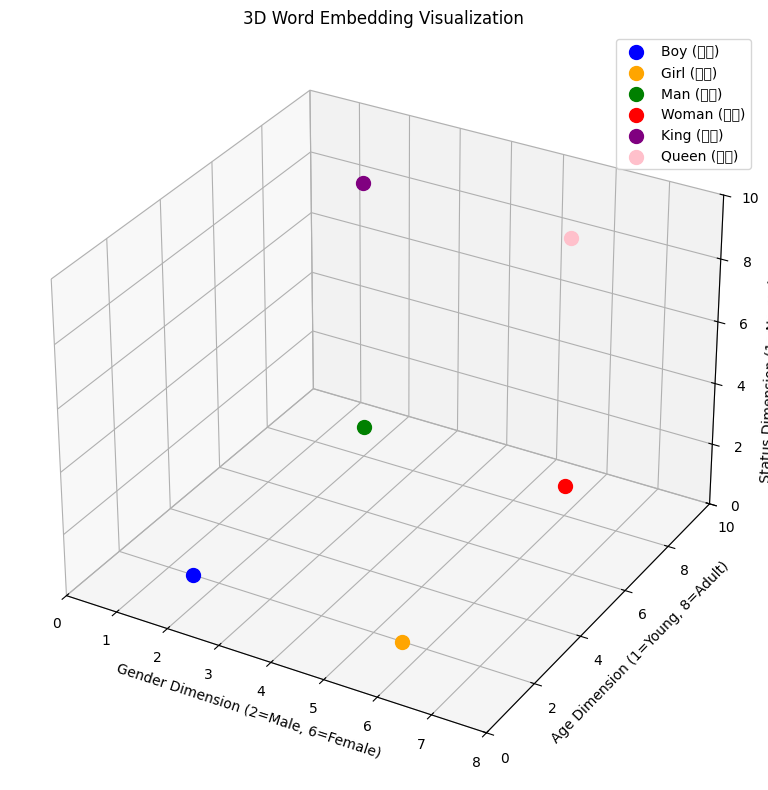

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 尝试启用交互模式（如果支持）
%matplotlib inline

# 坐标数据
points = {
    "Boy (男孩)": [2, 1, 1],
    "Girl (女孩)": [6, 1, 1],
    "Man (男人)": [2, 8, 1],
    "Woman (女人)": [6, 8, 1],
    "King (国王)": [2, 8, 9],
    "Queen (王后)": [6, 8, 9]
}

# 颜色映射
colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink']

# 创建单一视角的3D图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点
for i, (label, (x, y, z)) in enumerate(points.items()):
    ax.scatter(x, y, z, color=colors[i], s=100, label=label)

# 设置图表属性
ax.set_xlabel('Gender Dimension (2=Male, 6=Female)')
ax.set_ylabel('Age Dimension (1=Young, 8=Adult)')
ax.set_zlabel('Status Dimension (1=Normal, 9=Royal)')
ax.set_title('3D Word Embedding Visualization')

# 设置轴范围
ax.set_xlim(0, 8)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

# 添加图例
ax.legend()

plt.tight_layout()
plt.show()

#### 三维坐标的进一步提升

当我们加入第三个维度：
```json
男孩 = [2, 1, 1]
女孩 = [6, 1, 1]
男人 = [2, 8, 1]
女人 = [6, 8, 1]
国王 = [2, 8, 9]
王后 = [6, 8, 9]
```

计算机又多理解了一层关系：社会地位
- 1表示"普通人"
- 9表示"王室成员"

现在，计算机可以知道：
- "国王"和"男人"的关系类似于"王后"和"女人"的关系
- 它们都是从"普通"到"王室"的提升

#### 这在Embedding中有什么作用？

#### 1. 节省空间
对于50000个词，One-hot需要50000维，而Embedding只需300维左右。

#### 2. 发现隐藏关系
计算机可以发现词语之间未明确教给它的关系。例如：
```
国王 - 男人 + 女人 ≈ 王后
```

#### 3. 相似度计算
可以找出意思相近的词：
- "快乐"和"高兴"的向量会非常接近
- "苹果"和"香蕉"也会比"苹果"和"电脑"更接近

#### 4. 语义搜索
当你搜索"心脏病"时，也能找到只提到"冠心病"的文章，因为它们的向量很相似。

#### 递进的含义

从One-hot到多维Embedding的递进表明：

1. **从无关系到有关系**：
   - One-hot：词语之间没有关系
   - Embedding：词语之间有可测量的关系

2. **从简单到复杂**：
   - 二维：只能表达两种关系（如性别和年龄）
   - 三维：可以表达三种关系（如再加上社会地位）
   - 300维：可以表达数百种微妙的语义关系

3. **从人工到自动**：
   - 从人工设计特征到机器自动学习语义关系
   - 计算机可以自己发现我们没告诉它的关系

这种递进是现代人工智能理解语言的基础。从最早的One-hot编码，到Word2Vec，再到现在的BERT、GPT等大型语言模型，都是基于这种思想不断发展的结果。



### 为什么需要很多维度

想象一下描述一个人：
- 如果只用两个数字（身高和体重），能分辨出一些人
- 如果用10个数字（再加上年龄、血型、发色、眼睛颜色等），能分辨出更多人
- 如果用100个数字描述，几乎可以精确区分任何人

词语也是一样：
- 用2个数字(维度)：只能表达两种特征，比如"男/女"和"老/少"
- 用300个数字(维度)：可以表达数百种细微差别，比如情感色彩、使用场合、专业领域等

**简单来说**：维度越多，可以描述得越细致。

#### 多维度有什么用？

1. **区分相似词**：
   - "喜欢"vs"热爱"vs"痴迷" - 需要表达程度差异
   - "银行(金融机构)"vs"银行(河岸)" - 需要区分不同含义

2. **表达复杂关系**：
   - "国王-男人+女人=王后" 这种关系需要多维才能正确表达

3. **保存更多信息**：
   - 低维度会丢失很多细节
   - 高维度能保留词语的更多特征

#### 是不是维度越多越好？

不是的，就像照片的像素：
- 太少：图像模糊，看不清细节
- 适中：清晰且文件大小合理
- 太多：文件巨大，但肉眼可能看不出额外的细节

同样，Embedding维度：
- 太少(如10维)：丢失很多信息
- 适中(如300维)：表达足够丰富，计算效率尚可
- 太多(如10000维)：计算慢、占用空间大，可能引入噪音


#### 维度有上限吗？

理论上没有绝对上限，但实际上：
- 小型模型用50-100维
- 中型模型用100-300维
- 大型模型用300-1000维
- 超大模型可能用1000-4000维

选择维度主要考虑：
1. 有多少训练数据
2. 计算机有多快
3. 需要多精确的结果

#### 用生活例子解释

想象一个城市的地图：
- **2D地图**：只能显示南北、东西位置
- **3D地图**：可以加上高度信息
- **多维地图**：如果能有，还可以显示每个位置的温度、人口密度、噪音水平、空气质量等

词语的Embedding就像这样的"多维地图"，每增加一个维度，就能表达更多信息。


# 2.Embedding微调介绍

**Embedding的本质**就是把文字或图片转换成向量（一串数字）。

### 2.1 微调的原因

微调Embedding模型的核心原因是：**通用模型对特定领域词汇的理解不够准确**。

想象一下**两本词典**：

1. **普通汉英词典**：适合日常对话
2. **医学专业词典**：特别针对医学术语

如果你是医生，用普通词典翻译医学论文时会遇到问题：
- "肝脏"可能只被简单翻译成"liver"
- 但医学专业词典会更精确地解释肝脏的不同部位和病变

**Embedding微调就像从普通词典升级到专业词典**。

#### 实际应用

#### 例子1：医疗问答系统

**微调前（问题）**：

搜索"心脏病"时：
- 能找到包含"心脏病"的文章
- 但提可能找不到只到"冠心病"、"心肌梗塞"的相关文章
- 因为普通模型不知道这些词和"心脏病"密切相关

**微调后（改善）**：

搜索"心脏病"时：
- 不仅能找到包含"心脏病"的文章
- 还能找到提到"冠心病"、"心肌梗塞"等相关疾病的文章
- 因为微调后的模型学会了这些医学概念之间的关联

#### 例子2：电商产品推荐

**微调前（问题）**：
- 顾客浏览"机械键盘"
- 系统推荐了一些键盘，但也错误地推荐了钢琴键盘
- 因为普通Embedding主要看到了"键盘"这个词

**微调后（改善）**：
- 系统学会了"机械键盘"与"青轴"、"红轴"等电脑配件的关联
- 不再混淆音乐键盘和电脑键盘
- 推荐更精准的相关产品



#### 技术性解释

Embedding模型是通过词的**上下文共现关系**学习词义的：
- 在通用文本中，"苹果"经常和"吃"、"甜"出现
- 在技术文本中，"苹果"经常和"iPhone"、"iOS"出现

当你用通用语料训练的模型处理特定领域文本时，它不理解该领域内词语的**真实使用模式**。

微调就是让模型学习：
1. 专业词汇在领域内的实际使用模式
2. 领域特有词汇的正确表示
3. 同一个词在专业语境下的特殊含义


#### 需要微调的简单判断标准

如果你遇到下面任何一种情况，可能需要微调：

1. **特殊词汇多**：你的应用领域有很多专业术语
   - 例如：医疗、法律、金融、科技等专业词汇

2. **搜索结果不相关**：用户搜索A，却找不到明显相关的B
   - 例如：搜"笔记本"找不到"laptop"相关内容

3. **推荐不准确**：系统推荐的内容与用户兴趣相差甚远
   - 例如：看了编程教程，却推荐烹饪视频

4. **语义混淆严重**：系统无法区分同一个词在不同场景下的含义
   - 例如：分不清IT语境下的"苹果"和水果"苹果"



#### 通俗理解微调的作用

1. **更懂行话**：就像教会翻译软件理解医生之间的专业对话

2. **更懂关联**：能明白哪些不同的词其实表达相似的概念
   - "汽车"和"轿车"、"车辆"的关联

3. **更懂语境**：能区分同一个词在不同情况下的不同含义
   - 金融新闻中的"熊市"与动物园的"熊"不同


#### 总结

1. 微调Embedding是为了让模型更好地理解专业领域内词语的**真实关系**
2. 通用模型基于普通文本训练，不了解专业术语的特殊用法和关系
3. 微调过程实际上是让模型学习专业领域内词语的实际共现模式和语义关系
4. 微调后的模型能产生更符合特定领域语义的词向量，从而在该领域的应用中表现更好

实际上，微调Embedding模型就像是教一位懂普通汉语的翻译人员一些专业术语和行话。这位翻译原本就能把汉语句子翻译成英语，但当遇到医学、法律或金融专业词汇时，常常会误解其含义，因为这些词在专业领域中有特殊用法。    
微调过程实际上是让模型看大量专业文本，让它学习到在特定领域内，词语之间的真实关联方式。这样医学领域内，下次当您需要计算"肝脏"和"胆囊"的相似度时，微调后的医学Embedding模型会给出更高的分数，因为它已经学习到这两个器官在医学上的密切关系。

### Embedding微调框架全面对比

#### 主流Embedding微调框架对比表

| 框架名称 | 开发机构 | 主要优势 | 主要劣势 | 适用场景 | 学习曲线 | 社区支持 |
|---------|---------|---------|---------|---------|---------|---------|
| **Sentence-Transformers** | 德国UKP实验室 | 1. API设计简洁直观<br>2. 支持多种损失函数<br>3. 文档详尽全面<br>4. 多语言支持出色<br>5. 与HuggingFace生态集成 | 1. 大规模训练效率不足<br>2. 中文优化相对较弱<br>3. 高级自定义需深入代码<br>4. 批处理大小受限 | 1. 通用文本相似度任务<br>2. 学术研究<br>3. 多语言应用<br>4. 文本检索与匹配 | 较低 | 非常活跃，社区庞大 |
| **FlagEmbedding** | FlagOpen (智源研究院) | 1. 中文文本处理效果卓越<br>2. 检索场景优化出色<br>3. 训练速度快<br>4. BGE系列模型性能优异<br>5. 支持大规模数据训练 | 1. 文档相对不够全面<br>2. 社区规模较小<br>3. 学习曲线陡峭<br>4. 非中文支持相对较弱 | 1. 中文搜索与检索<br>2. 大规模语料训练<br>3. 商业级应用部署<br>4. 需要高性能中文Embedding | 中等 | 活跃度中等，成长中 |
| **SetFit** | Hugging Face | 1. 少样本学习效果出色<br>2. 训练速度极快<br>3. 资源消耗低<br>4. API易用性高<br>5. 与HF生态完美集成 | 1. 主要针对分类任务优化<br>2. 通用Embedding性能有限<br>3. 复杂场景支持不足<br>4. 大规模数据处理能力弱 | 1. 数据标注资源有限<br>2. 快速原型验证<br>3. 文本分类微调<br>4. 低计算资源环境 | 较低 | 较活跃，HF生态支持 |
| **TextEmbed** | Google (TensorFlow) | 1. 与TensorFlow无缝集成<br>2. 部署优化全面<br>3. 支持多平台部署<br>4. 分布式训练支持好<br>5. 生产环境友好 | 1. PyTorch用户不友好<br>2. 文档相对分散<br>3. API变化频繁<br>4. 自定义灵活性较低 | 1. TensorFlow项目<br>2. 企业级部署需求<br>3. 需要服务集成<br>4. 移动端部署 | 中等 | 适中，依附TF生态 |
| **EasyEmbed** | 开源社区 | 1. 极简API设计<br>2. 一键式微调<br>3. 学习曲线最平缓<br>4. 可视化支持好<br>5. 快速迭代友好 | 1. 高级功能有限<br>2. 性能优化不足<br>3. 社区支持弱<br>4. 不适合生产环境<br>5. 扩展性差 | 1. 入门学习<br>2. 快速实验<br>3. 概念验证<br>4. 小规模项目 | 非常低 | 有限，新兴工具 |

#### 技术功能详细对比表

| 功能特性 | Sentence-Transformers | FlagEmbedding | SetFit | TextEmbed | EasyEmbed |
|---------|----------------------|--------------|--------|----------|-----------|
| **支持的基础模型** | BERT, RoBERTa, MPNet, T5, DeBERTa, XLM-R等多种 | BERT, RoBERTa, BGE系列专有模型 | BERT, RoBERTa, DistilBERT系列 | BERT, Universal Sentence Encoder, LaBSE | BERT, MPNet, OpenAI模型 |
| **对比学习支持** | 完整支持，多种实现方式 | 完整支持，有针对检索的优化 | 基础支持，针对分类任务 | 部分支持，实现较复杂 | 基础支持，简化实现 |
| **三元组损失支持** | 完整支持，多种参数选项 | 支持，有针对性优化 | 有限支持 | 基础支持 | 基础支持 |
| **多语言支持** | 优秀，支持100+语言 | 中等，中文支持极佳 | 良好，依赖基础模型 | 优秀，支持多语言 | 中等，依赖基础模型 |
| **领域适应能力** | 优秀，多种适应方法 | 卓越，特别是中文领域 | 中等，主要针对分类 | 良好，但配置复杂 | 良好，但功能有限 |
| **少样本学习** | 中等，需要额外配置 | 中等，需要特定设置 | 卓越，核心功能 | 较弱，需要额外实现 | 良好，简化实现 |
| **知识蒸馏** | 良好，内置支持 | 优秀，有专门优化 | 较弱，有限支持 | 中等，需要自定义 | 较弱，基础实现 |
| **检索优化** | 良好，多种检索损失 | 卓越，专为检索优化 | 较弱，非主要目标 | 中等，需要额外配置 | 中等，基础实现 |
| **数据增强** | 良好，多种增强选项 | 良好，有针对性增强 | 中等，基础增强 | 中等，需要自定义 | 较弱，有限选项 |
| **批量大小扩展** | 中等，有一定限制 | 优秀，支持大批量训练 | 较弱，受限于设计 | 良好，支持分布式 | 较弱，有明显限制 |
| **训练速度** | 良好，优化平衡 | 优秀，针对速度优化 | 极快，专为快速训练 | 良好，支持加速 | 中等，简化实现 |
| **内存效率** | 中等，依赖配置 | 良好，有针对性优化 | 优秀，资源消耗低 | 良好，支持优化 | 中等，无特殊优化 |
| **微调精度** | 优秀，多种精度控制 | 优秀，特别在中文上 | 良好，在小数据集上佳 | 良好，但配置复杂 | 中等，简化实现 |
| **向量数据库集成** | 良好，支持多种数据库 | 优秀，专门优化 | 中等，基础支持 | 中等，需要额外配置 | 良好，简化集成 |
| **模型量化支持** | 中等，基础支持 | 良好，内置支持 | 中等，依赖HF实现 | 优秀，完整支持 | 较弱，有限支持 |
| **分布式训练** | 中等，基础支持 | 良好，内置支持 | 较弱，有限支持 | 优秀，完整支持 | 较弱，几乎不支持 |
| **推理性能** | 良好，平衡优化 | 优秀，针对性优化 | 中等，无特殊优化 | 良好，支持多种优化 | 中等，无特殊优化 |
| **自定义损失函数** | 优秀，完全支持 | 良好，较高灵活性 | 中等，有一定限制 | 良好，但实现复杂 | 较弱，有限支持 |
| **可视化支持** | 良好，基础可视化 | 中等，有限支持 | 良好，集成HF可视化 | 中等，依赖TensorBoard | 优秀，内置直观可视化 |

#### 文档与易用性对比表

| 特性 | Sentence-Transformers | FlagEmbedding | SetFit | TextEmbed | EasyEmbed |
|-----|----------------------|--------------|--------|----------|-----------|
| **文档完整度** | 非常完整，教程丰富 | 中等完整，部分细节缺失 | 完整，整合在HF文档中 | 中等，分散在TF文档中 | 中等，基础使用说明 |
| **示例代码丰富度** | 非常丰富，覆盖各种场景 | 良好，主要场景覆盖 | 良好，基础用例充足 | 中等，部分场景缺失 | 中等，基础使用示例 |
| **API一致性** | 优秀，设计一致且直观 | 良好，较为一致 | 优秀，设计简洁统一 | 中等，存在一些不一致 | 优秀，极简且一致 |
| **错误处理友好度** | 良好，错误信息明确 | 中等，部分错误信息有限 | 良好，错误提示清晰 | 中等，有时错误难以理解 | 良好，简化错误处理 |
| **配置复杂度** | 中等，参数较多但文档清晰 | 较高，需要理解多个参数 | 较低，默认配置良好 | 高，需要详细配置 | 非常低，最少配置 |
| **环境依赖** | 中等，主要依赖PyTorch和HF | 中等，依赖PyTorch和特定包 | 较低，HF生态即可 | 较高，依赖TensorFlow生态 | 较低，依赖最小化 |
| **安装难度** | 低，pip安装简单 | 低，pip安装简单 | 低，pip安装简单 | 中等，可能需要解决依赖 | 低，pip安装简单 |
| **调试便捷性** | 良好，输出信息充分 | 中等，部分过程不透明 | 良好，集成HF调试工具 | 中等，依赖TF调试工具 | 优秀，简化调试过程 |
| **版本兼容性** | 良好，向后兼容性强 | 中等，版本变化较快 | 良好，稳定API | 中等，随TF版本变化 | 良好，API稳定 |
| **社区问题解答** | 优秀，问题解答充分 | 中等，核心问题有解答 | 良好，HF社区支持 | 中等，分散在TF社区中 | 较弱，社区小 |

#### 实际应用场景匹配表

| 应用需求 | 最佳选择 | 次佳选择 | 说明 |
|---------|---------|---------|------|
| **通用文本相似度** | Sentence-Transformers | FlagEmbedding | Sentence-Transformers提供最全面的相似度训练方法和损失函数 |
| **中文文本检索** | FlagEmbedding | Sentence-Transformers | FlagEmbedding的BGE系列在中文检索上表现卓越 |
| **极少标注数据** | SetFit | EasyEmbed | SetFit专为少样本学习设计，可用极少数据获得良好效果 |
| **生产环境部署** | FlagEmbedding | TextEmbed | FlagEmbedding提供更好的推理性能和优化 |
| **多语言应用** | Sentence-Transformers | TextEmbed | Sentence-Transformers支持最广泛的多语言模型 |
| **学术研究** | Sentence-Transformers | FlagEmbedding | Sentence-Transformers提供最灵活的实验功能和最多的引用 |
| **快速原型开发** | EasyEmbed | SetFit | EasyEmbed提供最简单的API，适合快速实验 |
| **TensorFlow项目** | TextEmbed | Sentence-Transformers | TextEmbed与TensorFlow生态完美集成 |
| **跨模态应用** | Sentence-Transformers | FlagEmbedding | Sentence-Transformers支持文本-图像等跨模态训练 |
| **移动端部署** | TextEmbed | FlagEmbedding | TextEmbed支持TFLite转换，适合移动部署 |
| **大规模训练** | FlagEmbedding | TextEmbed | FlagEmbedding针对大批量和大数据集进行了优化 |
| **低计算资源环境** | SetFit | EasyEmbed | SetFit资源消耗最低，训练速度最快 |

#### 选择建议总结

1. **通用性和成熟度优先**：选择Sentence-Transformers，它是最成熟、支持最全面的框架，适合大多数场景。

2. **中文应用为主**：选择FlagEmbedding，其BGE系列模型在中文任务上表现卓越，特别是检索场景。

3. **资源受限或数据稀少**：选择SetFit，它能在极少样本和有限资源条件下快速训练出有效模型。

4. **TensorFlow生态系统**：选择TextEmbed，与TensorFlow完美集成，支持完整的部署优化。

5. **入门学习或快速验证**：选择EasyEmbed，提供最简单的API和最低的学习曲线。


# 3.模型微调

### 3.1 模型选择

embedding 模型排行榜

https://huggingface.co/spaces/mteb/leaderboard

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418182353267.png" width=100%></div>

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418173657330.png" width=100%></div>


#### 基本信息列
- **Rank (排名)**: 模型的总体排名
- **Model (模型)**: 模型的名称，如ritriveve_zh_v1、xiaobu-embedding-v2等
- **Zero-shot**: 零样本性能，显示百分比或NA标记
- **Memory Usage (内存使用)**: 模型运行所需内存，单位为MB
- **Number of Parameters (参数数量)**: 模型的参数规模，通常以百万(M)或十亿(B)为单位
- **Embedding Dimensions (嵌入维度)**: 生成的嵌入向量的维度大小
- **Max Tokens (最大令牌数)**: 模型能处理的最大token数量

#### 性能评估列
- **Mean (Task) (任务平均分)**: 在各任务上的平均分数
- **Mean (TaskType) (任务类型平均分)**: 按任务类型分类的平均分数
- **Classification (分类)**: 分类任务的性能分数
- **Clustering (聚类)**: 聚类任务的性能分数
- **Pair Classification (对分类)**: 句对分类任务的性能分数
- **Reranking (重排序)**: 重排序任务的性能分数
- **Retrieval (检索)**: 检索任务的性能分数
- **STS (语义文本相似度)**: 评估句子相似度的性能分数



#### **选择合适的嵌入模型**
#### 基本原则

我们需要平衡三个关键因素：
1. **任务性能** - 模型在特定任务上的表现
2. **资源消耗** - 模型所需的计算和存储资源
3. **实际需求** - 你的应用场景特定要求

#### 1. 明确应用场景和任务类型

首先确定你的主要应用场景：
- **检索(Retrieval)**: 如果你要构建文档检索、搜索引擎等应用
- **分类(Classification)**: 文本分类、情感分析等任务
- **聚类(Clustering)**: 需要对文本进行无监督分组
- **语义相似度(STS)**: 需要精确判断文本间的语义相似程度
- **对分类(Pair Classification)**: 判断文本对之间的关系

#### 2. 按性能指标选择

根据你的主要任务，关注对应的性能列：
- 构建搜索系统，优先看"Retrieval"一列
- 做文本分类应用，优先看"Classification"一列 
- 做问答系统，可能需要同时关注"Retrieval"和"Reranking"列

例如：
- 对于检索任务，Conan-embedding-v2(78.31)和Conan-embedding-v1(76.67)表现较好
- 对于对分类任务，Conan-embedding-v2(92.44)明显优于其他模型

#### 3. 考虑资源限制

根据你的硬件资源和部署环境限制：
- **内存限制**: 参考"Memory Usage"列
- **计算能力有限**: 选择参数量较小的模型(如果列出了Number of Parameters)
- **部署环境受限**: 考虑模型大小和推理速度

例如：
- 如果内存受限，可以考虑参数量较小的模型如gme-Owen2-VL-7B-Instruct(8B参数)
- 如果需要在边缘设备部署，可能需要选择嵌入维度更小的模型

#### 4. 综合考虑其他因素

- **嵌入维度(Embedding Dimensions)**: 
  - 较高维度(如3584)通常提供更丰富的语义表示，但消耗更多资源
  - 较低维度(如768)可能速度更快，存储更节省

- **最大Token数(Max Tokens)**:
  - 如果需要处理长文本，选择Max Tokens更高的模型(如Conan系列的32768)

- **Zero-shot性能**:
  - 高Zero-shot性能意味着模型在没有专门微调的情况下表现好


#### Conan-embedding-v1 模型分析

**优势：**
- **检索性能优秀**：Retrieval分数76.67，排名第三
- **分类性能很好**：Classification得分76.77，接近顶级水平
- **资源需求明确**：内存使用1242MB，参数量326M
- **超大上下文窗口**：同样支持32768个Tokens

**局限性：**
- **Zero-shot**：标记为NA，可能在零样本场景下表现不佳
- **嵌入维度小于v2**：768维，语义表示能力可能不如v2丰富


### 3.2 微调数据选取

HF上直接选择Datasets选项，输入Embedding关键词进行搜索

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418183758105.png" width=100%></div>

也可以直接在languages模块选择对应的语言进行过滤

https://huggingface.co/datasets?language=language:zh&sort=trending&search=embedding+

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418184513613.png" width=100%></div>

当前可以选择医疗数据进行测试

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418195731763.png" width=100%></div>

**微调Embedding模型的数据结构要求**

对于微调embedding模型用于检索场景（尤其是RAG系统），理想的数据结构确实应该包含至少三个关键组成部分：

1. **Query(查询)** - 用户可能提出的问题或查询文本
2. **Positive(正例)** - 与查询语义相关的文档或文本段落
3. **Negative(负例)** - 与查询语义不相关的文档或文本段落



#### 为什么是这种结构

**1. 向量空间的目标**

在检索系统中，我们希望：
- **语义相似**的文本在向量空间中**距离近**
- **语义不同**的文本在向量空间中**距离远**

如果只有查询(Query)，模型无法学习什么是"相似"，什么是"不同"。

**2. 三个字段的具体作用**

#### Query(查询)
- 作为**锚点(Anchor)**，是向量空间中的参考点
- 代表用户实际会问的问题或检索的内容
- 例如：`"区块链技术的应用场景"`

#### Positive(正例)
- 与Query**语义相关**的内容
- 教导模型："这种内容是我想要检索到的"
- 例如：`"区块链可应用于金融交易、供应链追踪和身份验证等多个领域。"`

#### Negative(负例)
- 与Query**语义无关**的内容
- 教导模型："这种内容不应该被检索到"
- 例如：`"传统数据库系统通常由中央服务器控制"`

#### 如果缺少任一字段会发生什么

#### 如果没有Positive(正例)
- 模型不知道什么内容应该与查询接近
- 无法学习相关性的模式
- 结果：检索时找不到相关内容

#### 如果没有Negative(负例)
- 模型不知道什么内容应该与查询远离
- 可能出现"向量坍缩"问题：所有向量都聚集在一起
- 结果：检索时返回大量不相关内容

#### 如果只有内容没有Query
- 模型无法学习针对实际检索问题的优化
- 无法建立"问题-答案"的语义映射
- 结果：检索效果与用户实际搜索行为不匹配


#### 常见的具体数据格式示例

#### 1. 三元组格式

```json
{
  "anchor": "如何预防糖尿病?",
  "positive": "糖尿病预防措施包括控制饮食、规律运动和定期检查血糖水平。",
  "negative": "最新款手机采用了全新的处理器架构和优化的散热系统。"
}
```



#### 2. 一对多格式(更常用)

```json
{
  "query": "区块链技术的应用场景",
  "positives": [
    "区块链可应用于金融交易、供应链追踪和身份验证等多个领域。",
    "分布式账本技术为跨境支付提供了新的解决方案。"
  ],
  "negatives": [
    "传统数据库系统通常由中央服务器控制",
    "人工智能在图像识别领域取得了突破性进展",
    "云计算服务可以根据需求弹性扩展资源"
  ]
}
```
训练过程中：
1. 模型计算"区块链技术的应用场景"与各positive的相似度，目标是使这个值**最大化**
2. 同时计算与各negative的相似度，目标是使这个值**最小化**
3. 通过这种"拉近相似、推远不同"的方式，模型学习到更精确的语义表示


#### 类比理解

可以将这三个字段理解为：
- Query(查询)：相当于**学习的目标点**
- Positive(正例)：相当于**应该被吸引的点**
- Negative(负例)：相当于**应该被排斥的点**

就像磁铁有正负极一样，这种对比机制让模型能够在语义空间中形成有意义的结构，而不是所有文本都混杂在一起。


### 3.3 Embedding微调的多种数据格式及应用场景



除了基本的Query-Positive-Negative三元组结构外，embedding微调还有其他几种重要的数据格式，每种格式适用于不同的应用场景。以下是详细介绍：

#### 1. 句对相似度格式 (Sentence Pair Similarity)

#### 数据结构
```json
[
  {"sentence1": "人工智能的伦理问题", "sentence2": "AI技术发展中的道德困境", "similarity": 0.9},
  {"sentence1": "人工智能的伦理问题", "sentence2": "最新款智能手机的性能评测", "similarity": 0.1}
]
```

#### 适用场景
- **语义相似度评估**: 判断两个句子的语义接近程度
- **文本匹配**: 评估文档与文档之间的匹配度
- **渐进式学习**: 通过不同程度的相似性进行细粒度训练
- **自然语言推理**: 辅助判断文本之间的推理关系

#### 实际应用
- 论文查重系统
- 智能客服的问题匹配
- 专利相似度比较



#### 2. 多级相关性格式 (Multi-level Relevance)

#### 数据结构
```json
{
  "query": "电动汽车的充电基础设施",
  "documents": [
    {"text": "各国正在加速建设电动汽车充电网络，解决里程焦虑问题", "relevance": 3},
    {"text": "锂电池技术的最新进展使电动车充电速度大幅提升", "relevance": 2},
    {"text": "电动汽车市场份额在2023年创历史新高", "relevance": 1},
    {"text": "传统燃油车的环保改进措施", "relevance": 0}
  ]
}
```

#### 适用场景
- **搜索引擎优化**: 训练模型理解多级别的相关性
- **推荐系统**: 建立内容推荐的精细化排序
- **信息检索**: 处理模糊匹配和部分相关的情况

#### 实际应用
- 学术文献检索系统
- 电子商务产品搜索
- 法律条文相关性判断



#### 3. 多查询-单文档格式 (Multiple Queries - Single Document)

#### 数据结构
```json
{
  "document": "比特币是一种去中心化的加密货币，基于区块链技术运行，无需中央银行或单一管理者。",
  "relevant_queries": [
    "什么是比特币",
    "区块链货币介绍",
    "加密货币工作原理"
  ],
  "irrelevant_queries": [
    "股票市场分析工具",
    "银行贷款利率比较",
    "如何挑选基金产品"
  ]
}
```

#### 适用场景
- **反向索引优化**: 优化从文档到可能查询的映射
- **内容标签生成**: 自动为内容生成相关标签或关键词
- **文档检索增强**: 提高文档被适当查询检索到的概率

#### 实际应用
- 内容管理系统的智能标记
- SEO关键词优化
- 知识库文档的可发现性提升



#### 4. 层次化相关性格式 (Hierarchical Relevance)

#### 数据结构
```json
{
  "query": "机器学习算法",
  "exact_match": [
    "常见机器学习算法的优缺点比较"
  ],
  "highly_relevant": [
    "深度学习与传统机器学习方法的区别",
    "监督学习算法在图像识别中的应用"
  ],
  "somewhat_relevant": [
    "Python在数据科学中的应用",
    "大数据处理框架简介"
  ],
  "not_relevant": [
    "企业财务报表分析方法",
    "生物基因测序技术的进展"
  ]
}
```

#### 适用场景
- **复杂搜索系统**: 需要理解多层次相关性的搜索引擎
- **专家系统**: 需要对信息进行精细分级的知识库
- **教育应用**: 按知识关联度组织学习材料

#### 实际应用
- 医学文献检索系统
- 法律条文关联分析
- 学术研究辅助工具



#### 5. 跨语言对齐格式 (Cross-lingual Alignment)

#### 数据结构
```json
[
  {
    "text_zh": "人工智能正在改变我们的生活方式",
    "text_en": "Artificial intelligence is changing our way of life",
    "alignment": 1.0
  },
  {
    "text_zh": "数据安全与隐私保护日益重要",
    "text_en": "Data security and privacy protection are increasingly important",
    "alignment": 1.0
  }
]
```

#### 适用场景
- **跨语言检索**: 能够检索不同语言的相关内容
- **多语言知识库**: 在多语言环境中提供一致的检索体验
- **翻译辅助**: 增强机器翻译的语义准确性

#### 实际应用
- 国际学术数据库检索
- 多语言客服系统
- 跨境电商平台

#### 6.....

#### 如何选择合适的数据格式

选择合适的数据格式应考虑以下因素：

1. **应用目标**:
   - 通用检索: 使用基本的三元组格式
   - 精确度要求高: 考虑多级相关性或层次化相关性格式
   - 特殊领域: 可能需要实体-属性-值等结构化格式

2. **现有数据情况**:
   - 如果有用户查询日志: 适合构建查询-文档格式
   - 如果有领域知识库: 可考虑多查询-单文档格式
   - 如果有多语言需求: 使用跨语言对齐格式

3. **计算资源**:
   - 资源受限: 使用简单的句对或三元组格式
   - 资源充足: 可以采用更复杂的层次化或多级相关性格式

#### 结论

embedding模型微调的数据格式多种多样，根据你的具体应用场景、数据特点和资源情况，选择或组合使用不同的数据格式，可以显著提升模型在特定任务上的表现。

最佳实践是根据你的实际应用场景，先从基础的三元组格式开始，然后根据业务需求和模型表现，逐步尝试更专业化的数据格式，通过实验确定最适合你场景的训练数据结构。

# 4. Embedding模型微调实战

### 4.1基础环境准备

当前使用的为autodl租赁服务器RTX 3090 * 2卡，PyTorch=2.3.0、Python=3.12(ubuntu22.04)、CUDA=12.1

autodl 创建conda环境

conda create -n embedding_ft python=3.11 -y

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420071053794.png" width=100%></div>

直接切换conda环境 初次使用需要执行conda init 如果不管用  关闭当前窗口再另起一个命令窗口

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420071539279.png" width=100%></div>

#### 模型下载

https://huggingface.co/TencentBAC/Conan-embedding-v1

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418182928029.png" width=100%></div>

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418183324199.png" width=100%></div>

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418183357238.png" width=100%></div>

git lfs install

git clone https://huggingface.co/TencentBAC/Conan-embedding-v1

也可以使用以下下载方式(或者自己习惯的下载方式)

pip install -U huggingface_hub

python -c "from huggingface_hub import snapshot_download; snapshot_download(repo_id='TencentBAC/Conan-embedding-v1', local_dir='./Conan-embedding-v1', local_dir_use_symlinks=False)"


<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420072143384.png" width=100%></div>

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420073616036.png" width=100%></div>

遇到超时报错直接开启学术加速

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420072454288.png" width=100%></div>

学术加速命令  source /etc/network_turbo

再次执行下载命令

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420072537751.png" width=100%></div>

#### 数据集下载

pip install dataset

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250418195731763.png" width=100%></div>

python -c 'from datasets import load_dataset; ds = load_dataset("fine-tuned/jinaai_jina-embeddings-v2-base-zh-CMedQAv2")'

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420073801813.png" width=100%></div>

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420073912994.png" width=100%></div>

python -c 'from datasets import load_dataset; ds = load_dataset("fine-tuned/jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-CM")'

from datasets import load_dataset;ds = load_dataset("fine-tuned/jinaai_jina-embeddings-v2-base-zh-CMedQAv2")

from datasets import load_dataset;ds = load_dataset("fine-tuned/jinaai_jina-embeddings-v2-base-zh-CMedQAv2-2")

from datasets import load_dataset;ds = load_dataset("fine-tuned/jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-CM")

from datasets import load_dataset;ds = load_dataset("fine-tuned/jinaai_jina-embeddings-v2-base-zh-CMedQAv2-3")

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420074009985.png" width=100%></div>

默认路径 ~/.cache/huggingface/datasets   复制到自己指定文件夹即可

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250420075735839.png" width=100%></div>

### 4.2 文本完整性验证

pip install pyarrow pandas datasets

In [1]:
import os
import glob
from datasets import Dataset, Features
import pyarrow as pa

# 设置数据目录路径
# 该路径下存放了需要分析的数据文件
data_dir = "/root/autodl-tmp/muyan/data/"

# 查找所有以"jinaai_jina-embeddings-v2-base-zh"开头，以"train.arrow"结尾的文件
# 使用glob模块进行模式匹配，找出所有符合条件的训练数据文件
# Arrow文件是一种列式存储格式，适合高效处理大型数据集
train_files = glob.glob(os.path.join(data_dir, "jinaai_jina-embeddings-v2-base-zh*train.arrow"))

# 打印找到的训练文件数量，便于快速了解数据规模
print(f"找到 {len(train_files)} 个训练数据文件")

# 遍历每个找到的训练文件进行分析
for file_path in train_files:
    # 打印分隔线和文件名，增强输出可读性
    print("\n" + "="*80)
    file_name = os.path.basename(file_path)
    print(f"分析文件: {file_name}")
    
    try:
        # 直接从Arrow文件加载数据集
        # 使用datasets库的from_file方法，可以高效读取Arrow格式的数据
        dataset = Dataset.from_file(file_path)
        
        # 输出数据集基本信息，包括读取状态、数据条数和字段列表
        # 这些信息有助于快速了解数据集的基本结构
        print(f"数据完整性: 成功读取")
        print(f"数据条数: {len(dataset)}")
        print(f"字段: {list(dataset.features.keys())}")
        
        # 展示第一条数据，帮助直观了解数据内容
        if len(dataset) > 0:
            print("\n数据预览 (第一条记录):")
            first_record = dataset[0]
            
            # 遍历第一条记录的每个字段及其值
            for key, value in first_record.items():
                # 如果值是列表且很长，只显示前3项并标注总长度
                # 这样可以避免输出过长，同时提供足够的信息了解数据结构
                if isinstance(value, list) and len(value) > 5:
                    print(f"{key}: {value[:3]} ... [列表共{len(value)}项]")
                # 如果是字符串且很长，只显示前100个字符
                # 适用于大文本字段的简洁展示
                elif isinstance(value, str) and len(value) > 100:
                    print(f"{key}: {value[:100]}...")
                # 其他情况完整显示值
                else:
                    print(f"{key}: {value}")
        else:
            # 如果数据集为空，发出警告
            print("警告: 数据集为空")
            
    except Exception as e:
        # 捕获并打印读取过程中可能出现的错误
        # 这对于快速诊断数据问题非常重要
        print(f"错误: 无法读取文件 {file_name}")
        print(f"错误信息: {str(e)}")

# 标记分析完成
print("\n" + "="*80)
print("数据验证完成")

找到 4 个训练数据文件

分析文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow
数据完整性: 成功读取
数据条数: 64
字段: ['query', 'pos', 'neg']

数据预览 (第一条记录):
query: 呼吸医学 专家
pos: ['呼吸系统的专业医生']
neg: ['关于呼吸医学的最新消息', '呼吸医学是研究呼吸系统相关疾病和治疗方法的学科。', '在呼吸医学中，诊断是通过症状、体征和检查结果来确认疾病或病情的过程。'] ... [列表共7项]

分析文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow
数据完整性: 成功读取
数据条数: 64
字段: ['query', 'pos', 'neg']

数据预览 (第一条记录):
query: 分诊 系统 方法 应用
pos: ['"心绞痛是一种常见的心血管疾病，主要表现为胸痛、胸闷等症状。糖尿病是一种慢性代谢性疾病，患者常伴有高血糖、多饮多尿等症状。哮喘是一种常见的呼吸道疾病，患者容易出现呼吸困难、咳嗽等症状。高血压是一种常见的心血管疾病，患者常伴有头痛、头晕等症状。冠心病是一种心脏疾病，患者常出现心绞痛、心悸等症状。中风是一种急性脑血管疾病，患者常出现偏瘫、言语障碍等症状。肺癌是一种恶性肿瘤，患者常伴有咳血、胸痛等症状。痛风是一种代谢性疾病，患者常出现关节疼痛、红肿等症状。"']
neg: ['"在第一天之后，澳大利亚人处于领先地位，这种情况类似于医生在分诊时应用的系统。就像医生根据病人的症状和状况来决定治疗方法一样，澳大利亚人在比赛中展现出了他们的实力和技巧。这种领先地位就像医生在系统中对病人进行分诊一样清晰明了。他们的方法和策略就像医生对病人的治疗方案一样精准有效。澳大利亚人在第一天的表现让人印象深刻，就像医生在应用最佳系统来处理病人一样令人信服。他们的领先地位就像医生在分诊时应用的系统一样稳固可靠。"', '"复利是金融领域中一种重要的财务方法，通过复利计算，投资者可以实现资金增长。复利的应用广泛，可以用于存款、贷款、投资等方面。复利是一种系统性的财务工具，能够帮助投资者更好地规划财务目标和未来。在复利计算中，时间是一个关键因素，时间越

### 4.3 数据清洗

In [4]:
# 医疗数据过滤 - 简化版
# 这个程序的主要功能是过滤和清洗医疗数据，通过相似度计算和文本质量检查筛选高质量样本

import os
import glob
import re
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import Dataset, load_dataset, Features, Sequence, Value
from sentence_transformers import SentenceTransformer, util
import torch
import pyarrow as pa
from collections import Counter

# 设置路径
# data_dir: 原始数据目录
# model_path: 用于计算文本相似度的模型路径
# output_dir: 过滤后数据的输出目录
data_dir = "/root/autodl-tmp/muyan/data"
model_path = "/root/autodl-tmp/muyan/Conan-embedding-v1"
output_dir = "/root/autodl-tmp/muyan/filtered_data"

# 创建输出目录（如果不存在）
os.makedirs(output_dir, exist_ok=True)

# 加载文本嵌入模型
# 用于计算文本之间的语义相似度
print("加载基础模型...")
model = SentenceTransformer(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 查找需要处理的数据文件
# 使用glob模块匹配训练和测试数据文件
train_files = glob.glob(os.path.join(data_dir, "*train*.arrow"))
test_files = glob.glob(os.path.join(data_dir, "*test*.arrow"))

print(f"找到训练文件: {train_files}")
print(f"找到测试文件: {test_files}")

# 文本质量检查函数
# 作用：评估文本是否满足基本质量要求
# 参数：text - 要检查的文本
# 返回：(是否通过检查, 原因)
# 示例：
#   check_text_quality("正常文本") -> (True, "通过")
#   check_text_quality("") -> (False, "空白文本")
def check_text_quality(text):
    """基本文本质量检查"""
    if not isinstance(text, str):
        return False, "非文本类型"
    
    # 文本长度检查，至少7个字符
    if len(text) < 7:
        return False, "文本过短"
    
    if text.strip() == "":
        return False, "空白文本"
    
    # 检查明显的格式问题
    # 计算非常规字符（非中英文、数字、基本标点）的比例
    unusual_char_ratio = len(re.findall(r'[^\w\s\u4e00-\u9fff.,;?!，。；？！()（）【】]', text)) / max(len(text), 1)
    if unusual_char_ratio > 0.3:
        return False, "异常字符比例过高"
    
    return True, "通过"

# 相似度过滤函数
# 作用：基于语义相似度筛选正例和负例
# 参数：
#   query - 查询文本
#   pos_list - 候选正例列表
#   neg_list - 候选负例列表
#   min_pos_sim - 正例最小相似度阈值
#   max_neg_sim - 负例最大相似度阈值
#   min_contrast - 正负例最小对比度
#   max_neg_to_keep - 保留的最大负例数量
# 返回：(过滤后的正例列表, 过滤后的负例列表)
# 示例：
#   filter_by_similarity("高血压症状", ["高血压的常见表现", "心脏病"], ["糖尿病", "感冒"]) 
#   -> (["高血压的常见表现"], ["感冒"])
def filter_by_similarity(query, pos_list, neg_list, min_pos_sim=0.15, max_neg_sim=0.85, min_contrast=0.05, max_neg_to_keep=5):
    """基于相似度过滤样本，更好保留负样本"""
    if not pos_list and not neg_list:
        return [], []
    
    # 编码查询
    query_embedding = model.encode(query, convert_to_tensor=True, show_progress_bar=False)
    
    # 过滤正例
    filtered_pos = []
    pos_similarities = []
    
    if pos_list:
        # 编码正例
        pos_embeddings = model.encode(pos_list, convert_to_tensor=True, show_progress_bar=False)
        
        for i, pos in enumerate(pos_list):
            # 只进行基本文本检查
            quality_check, reason = check_text_quality(pos)
            if not quality_check:
                continue
                
            # 计算相似度
            similarity = util.cos_sim(query_embedding, pos_embeddings[i]).item()
            
            # 保留相似度高于阈值的正例
            if similarity >= min_pos_sim:
                filtered_pos.append(pos)
                pos_similarities.append(similarity)
    
    # 过滤负例 - 更平衡的策略
    filtered_neg = []
    neg_similarities = []
    
    if neg_list:
        # 编码负例
        neg_embeddings = model.encode(neg_list, convert_to_tensor=True, show_progress_bar=False)
        
        # 最高正例相似度
        max_pos_sim = max(pos_similarities) if pos_similarities else 0.5  # 默认值0.5更合理
        
        # 计算所有负例的相似度
        all_neg_similarities = []
        valid_neg_indices = []
        
        for i, neg in enumerate(neg_list):
            # 只进行基本文本检查
            quality_check, reason = check_text_quality(neg)
            if not quality_check:
                continue
                
            # 计算相似度
            similarity = util.cos_sim(query_embedding, neg_embeddings[i]).item()
            
            # 采用更宽松的条件: 只过滤掉相似度极高的负例
            if similarity < max_neg_sim:
                all_neg_similarities.append(similarity)
                valid_neg_indices.append(i)
        
        # 如果有效负例过多，分层采样
        if len(valid_neg_indices) > max_neg_to_keep:
            # 将负例分为三组：低相似度、中相似度、高相似度（硬负例）
            sim_threshold_low = 0.3
            sim_threshold_high = 0.6
            
            low_sim_indices = [idx for i, idx in enumerate(valid_neg_indices) if all_neg_similarities[i] < sim_threshold_low]
            mid_sim_indices = [idx for i, idx in enumerate(valid_neg_indices) if sim_threshold_low <= all_neg_similarities[i] < sim_threshold_high]
            high_sim_indices = [idx for i, idx in enumerate(valid_neg_indices) if all_neg_similarities[i] >= sim_threshold_high]
            
            # 从每组采样，保证多样性
            import random
            sampled_indices = []
            
            # 优先保留硬负例
            high_count = min(2, len(high_sim_indices))
            mid_count = min(2, len(mid_sim_indices))
            low_count = max(1, max_neg_to_keep - high_count - mid_count)
            
            if high_sim_indices:
                sampled_indices.extend(random.sample(high_sim_indices, high_count))
            if mid_sim_indices:
                sampled_indices.extend(random.sample(mid_sim_indices, mid_count))
            if low_sim_indices:
                sampled_indices.extend(random.sample(low_sim_indices, min(low_count, len(low_sim_indices))))
            
            # 如果采样后数量不足，再从剩余的负例中随机补充
            remaining = set(valid_neg_indices) - set(sampled_indices)
            if remaining and len(sampled_indices) < max_neg_to_keep:
                sampled_indices.extend(random.sample(list(remaining), min(max_neg_to_keep - len(sampled_indices), len(remaining))))
            
            # 应用采样结果
            for idx in sampled_indices:
                filtered_neg.append(neg_list[idx])
                neg_similarities.append(util.cos_sim(query_embedding, neg_embeddings[idx]).item())
        else:
            # 负例数量较少，全部保留
            for i, idx in enumerate(valid_neg_indices):
                filtered_neg.append(neg_list[idx])
                neg_similarities.append(all_neg_similarities[i])
    
    return filtered_pos, filtered_neg

# 数据集检查函数
# 作用：检查和打印数据集的结构信息，便于调试
# 参数：dataset - 要检查的数据集对象
# 返回：无，直接打印结果
def inspect_dataset(dataset):
    """检查数据集结构并打印示例"""
    print("\n数据集结构检查:")
    print(f"数据集类型: {type(dataset)}")
    
    # 获取第一个样本来检查结构
    if len(dataset) > 0:
        first_item = dataset[0]
        print(f"第一个样本类型: {type(first_item)}")
        print(f"第一个样本内容: {first_item}")
        
        # 如果是字典，检查键
        if isinstance(first_item, dict):
            print(f"样本键: {list(first_item.keys())}")
        
        # 如果不是字典，尝试打印前100个字符
        elif isinstance(first_item, str):
            print(f"样本开头(100字符): {first_item[:100]}...")
            # 尝试解析为JSON
            try:
                parsed = json.loads(first_item)
                print(f"解析为JSON后: {type(parsed)}")
                if isinstance(parsed, dict):
                    print(f"JSON键: {list(parsed.keys())}")
            except:
                print("无法解析为JSON")
    else:
        print("数据集为空")

# 数据集处理函数
# 作用：加载、处理和过滤数据集，并保存结果
# 参数：file_path - 要处理的数据文件路径
# 返回：包含处理统计信息的字典
# 示例返回值：
# {
#   'file': 'train.arrow',
#   'total_samples': 1000,
#   'filtered_samples': 800,
#   'total_pos': 2500,
#   'filtered_pos': 2000,
#   'total_neg': 5000,
#   'filtered_neg': 3500,
#   'rejection_reasons': {'查询_文本过短': 50, '无有效正负例': 150}
# }
def process_dataset(file_path):
    """处理数据集并过滤"""
    print(f"处理文件: {os.path.basename(file_path)}")
    
    # 尝试加载数据集
    try:
        # 使用datasets库加载arrow文件
        dataset = load_dataset("arrow", data_files=file_path, split="train")
        print(f"成功加载数据集，包含 {len(dataset)} 个样本")
        
        # 检查数据集结构
        inspect_dataset(dataset)
        
        # 保存原始特征结构，用于稍后生成相同格式的数据集
        original_features = dataset.features
        
        # 获取数据字段
        features = dataset.features
        print(f"数据集字段: {features}")
        
        # 确定正确的字段名
        query_field = 'query' if 'query' in features else None
        pos_field = 'pos' if 'pos' in features else 'positive'
        neg_field = 'neg' if 'neg' in features else 'negative'
        
        if not query_field:
            # 尝试寻找可能的查询字段
            for field in features:
                if 'query' in field.lower() or 'question' in field.lower():
                    query_field = field
                    break
        
        if not query_field:
            print(f"错误: 无法确定查询字段，可用字段: {features}")
            return {
                'file': os.path.basename(file_path),
                'error': "无法确定查询字段"
            }
        
        print(f"使用字段: query={query_field}, pos={pos_field}, neg={neg_field}")
        
        # 过滤前的统计
        total_samples = len(dataset)
        # 根据实际数据结构计算正负例数量
        total_pos = 0
        total_neg = 0
        
        for sample in dataset:
            if isinstance(sample, dict):  # 确保样本是字典类型
                pos_list = sample.get(pos_field, [])
                neg_list = sample.get(neg_field, [])
                # 处理字符串格式的列表
                if isinstance(pos_list, str):
                    try:
                        pos_list = json.loads(pos_list)
                    except:
                        pos_list = [pos_list] if pos_list else []
                elif not isinstance(pos_list, list):
                    pos_list = [pos_list] if pos_list else []
                
                if isinstance(neg_list, str):
                    try:
                        neg_list = json.loads(neg_list)
                    except:
                        neg_list = [neg_list] if neg_list else []
                elif not isinstance(neg_list, list):
                    neg_list = [neg_list] if neg_list else []
                
                total_pos += len(pos_list)
                total_neg += len(neg_list)
            else:
                print(f"警告: 非字典类型样本: {type(sample)}")
        
        # 过滤后的数据
        filtered_data = []
        rejection_reasons = Counter()
        
        # 批量处理
        batch_size = 32
        for batch_idx in tqdm(range(0, len(dataset), batch_size), desc="过滤数据"):
            batch_end = min(batch_idx + batch_size, len(dataset))
            
            # 直接处理原始数据集中的样本
            for i in range(batch_idx, batch_end):
                # 直接从数据集获取每个样本
                sample = dataset[i]
                
                # 确保样本是字典类型
                if not isinstance(sample, dict):
                    rejection_reasons["非字典类型样本"] += 1
                    continue
                
                # 获取查询
                query = sample.get(query_field, "")
                if not isinstance(query, str):
                    rejection_reasons["查询非字符串类型"] += 1
                    continue
                
                # 获取正负例
                pos_list = sample.get(pos_field, [])
                neg_list = sample.get(neg_field, [])
                
                # 处理字符串格式的列表
                if isinstance(pos_list, str):
                    try:
                        pos_list = json.loads(pos_list)
                    except:
                        pos_list = [pos_list] if pos_list else []
                elif not isinstance(pos_list, list):
                    pos_list = [pos_list] if pos_list else []
                
                if isinstance(neg_list, str):
                    try:
                        neg_list = json.loads(neg_list)
                    except:
                        neg_list = [neg_list] if neg_list else []
                elif not isinstance(neg_list, list):
                    neg_list = [neg_list] if neg_list else []
                
                # 检查查询文本质量
                query_quality, reason = check_text_quality(query)
                if not query_quality:
                    rejection_reasons[f"查询_{reason}"] += 1
                    continue
                
                # 应用相似度过滤
                filtered_pos, filtered_neg = filter_by_similarity(
                    query, pos_list, neg_list, 
                    min_pos_sim=0.15,
                    max_neg_sim=0.85,
                    min_contrast=0.05,
                    max_neg_to_keep=5
                )
                
                # 只保留至少有一个正例或负例的样本
                if filtered_pos or filtered_neg:
                    filtered_data.append({
                        query_field: query,
                        pos_field: filtered_pos,
                        neg_field: filtered_neg
                    })
                else:
                    rejection_reasons["无有效正负例"] += 1
        
    except Exception as e:
        print(f"处理数据集时出错: {str(e)}")
        import traceback
        traceback.print_exc()
        return {
            'file': os.path.basename(file_path),
            'error': str(e)
        }
    
    # 过滤后的统计
    filtered_samples = len(filtered_data)
    filtered_pos = sum(len(item.get(pos_field, [])) for item in filtered_data)
    filtered_neg = sum(len(item.get(neg_field, [])) for item in filtered_data)
    
    # 保存过滤后的数据 - 使用标准的Arrow格式
    file_name = os.path.basename(file_path)
    output_path = os.path.join(output_dir, f"{file_name}")  # 保持与原始文件相同的名称
    
    try:
        # 准备Dataset的特征定义
        features = Features({
            query_field: Value(dtype="string"),
            pos_field: Sequence(Value(dtype="string")),
            neg_field: Sequence(Value(dtype="string"))
        })
        
        # 创建过滤后的数据集
        filtered_dataset = Dataset.from_dict(
            {
                query_field: [item[query_field] for item in filtered_data],
                pos_field: [item[pos_field] for item in filtered_data],
                neg_field: [item[neg_field] for item in filtered_data]
            },
            features=features
        )
        
        # 使用标准方法保存为Arrow格式
        filtered_dataset.save_to_disk(output_path + "_temp")
        
        # 重命名为正确的文件名
        # 因为save_to_disk会创建一个目录，我们需要处理一下
        arrow_file = os.path.join(output_path + "_temp", "data-00000-of-00001.arrow")
        if os.path.exists(arrow_file):
            import shutil
            shutil.copy(arrow_file, output_path)
            shutil.rmtree(output_path + "_temp")
            print(f"\n过滤结果已保存到: {output_path}")
        else:
            print(f"警告: 未能找到生成的Arrow文件")
    except Exception as e:
        print(f"保存文件时出错: {str(e)}")
        import traceback
        traceback.print_exc()
    
    # 打印统计信息
    print(f"\n过滤结果统计 - {os.path.basename(file_path)}:")
    print(f"原始样本数: {total_samples} → 过滤后: {filtered_samples} ({filtered_samples/total_samples:.2%})")
    print(f"原始正例数: {total_pos} → 过滤后: {filtered_pos} ({filtered_pos/total_pos:.2%})")
    print(f"原始负例数: {total_neg} → 过滤后: {filtered_neg} ({filtered_neg/total_neg:.2%})")
    print("\n被拒绝的原因统计:")
    for reason, count in rejection_reasons.most_common():
        print(f"- {reason}: {count}")
    
    # 返回统计信息
    return {
        'file': os.path.basename(file_path),
        'total_samples': total_samples,
        'filtered_samples': filtered_samples,
        'total_pos': total_pos,
        'filtered_pos': filtered_pos,
        'total_neg': total_neg,
        'filtered_neg': filtered_neg,
        'rejection_reasons': dict(rejection_reasons)
    }

# 主执行函数
# 作用：协调整个程序的执行流程
# 参数：无
# 返回：无
def main():
    """主函数"""
    print("开始医疗数据过滤流程...")
    
    # 处理所有文件
    all_stats = []
    for file_path in train_files + test_files:
        stat = process_dataset(file_path)
        all_stats.append(stat)
    
    # 保存统计信息
    with open(os.path.join(output_dir, 'filtering_stats.json'), 'w', encoding='utf-8') as f:
        json.dump(all_stats, f, ensure_ascii=False, indent=2)
    
    print("\n数据过滤完成!")
    print(f"过滤后的数据保存在: {output_dir}")

# 执行主函数
if __name__ == "__main__":
    main()

2025-04-23 15:04:05 - Use pytorch device_name: cuda:0
2025-04-23 15:04:05 - Load pretrained SentenceTransformer: /root/autodl-tmp/muyan/Conan-embedding-v1


加载基础模型...
找到训练文件: ['/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow', '/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow', '/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-train.arrow', '/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-train.arrow']
找到测试文件: ['/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow', '/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow', '/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow', '/root/autodl-tmp/muyan/data/jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-test.arrow']
开始医疗数据过滤流程...
处理文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 64 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '呼吸医学 专家', 'pos': ['呼吸系统的专业医生'], 'neg': ['关于呼吸医学的最新消息', '呼吸医学是研究呼吸系统相关疾病和治疗方法的学科。', '在呼吸医学中，诊断是通过症状、体征和检查结果来确认疾病或病情的过程。', '呼吸医学的治疗方法包括药物治疗、物理治疗和手术治疗。', '关于呼吸医学的病例研究', '呼吸医学领域涉及的技术包括呼吸功能检测、肺功能评估、睡眠呼吸监测等。这些技术可以帮助医生诊断和治疗与呼吸系统相关的疾病。', '关于呼吸系统的学术会议']}
样本键: ['query', 'pos', 'neg']
数据集字段: {'query': Value(dtype='string', id=None), 'pos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'neg': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}
使用字段: query=query, pos=pos, neg=neg


过滤数据: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]


Saving the dataset (0/1 shards):   0%|          | 0/47 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow:
原始样本数: 64 → 过滤后: 47 (73.44%)
原始正例数: 64 → 过滤后: 47 (73.44%)
原始负例数: 448 → 过滤后: 192 (42.86%)

被拒绝的原因统计:
- 查询_文本过短: 17
处理文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 64 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '分诊 系统 方法 应用', 'pos': ['"心绞痛是一种常见的心血管疾病，主要表现为胸痛、胸闷等症状。糖尿病是一种慢性代谢性疾病，患者常伴有高血糖、多饮多尿等症状。哮喘是一种常见的呼吸道疾病，患者容易出现呼吸困难、咳嗽等症状。高血压是一种常见的心血管疾病，患者常伴有头痛、头晕等症状。冠心病是一种心脏疾病，患者常出现心绞痛、心悸等症状。中风是一种急性脑血管疾病，患者常出现偏瘫、言语障碍等症状。肺癌是一种恶性肿瘤，患者常伴有咳血、胸痛等症状。痛风是一种代谢性疾病，患者常出现关节疼痛、红肿等症状。"'], 'neg': ['"在第一天之后，澳大利亚人处于领先地位，这种情况类似于医生在分诊时应用的系统。就像医生根据病人的症状和状况来决定治疗方法一样，澳大利亚人在比赛中展现出了他们的实力和技巧。这种领先地位就像医生在系统中对病人进行分诊一样清晰明了。他们的方法和策略就像医生对病人的治疗方案一样精准有效。澳大利亚人在第一天的表现让人印象深刻，就像医生在应用最佳系统来处理病人一样令人信服。他们的领先地位就像医生在分诊时应用的系统一样稳固可靠。"', '"复利是金融领域中一种重要的财务方法，通过复利计算，投资者可以实现资金增长。复利的应用广泛，可以用于存款、贷款、投资等方面。复利是一种系统性的财务工具，能够帮助投资者更好地规划财务目标和未来。在复利计算中，时间是一个关键因素，时间越长，复利效应越显著。投资者应该充分了解复利的原理和计算方法，以便更好地利用复利来增加财富。在金融市场中，复利可以带来长期稳定的收益，但也需要投资者谨慎分析风险，选择合适的投资方式和策略。"', '"In the legal domain, the bench serves as the central authority in courtrooms, overseeing the proceedings and ensuring fair trials. Judges presiding over the bench are responsible for inte

过滤数据: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


Saving the dataset (0/1 shards):   0%|          | 0/56 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow:
原始样本数: 64 → 过滤后: 56 (87.50%)
原始正例数: 64 → 过滤后: 56 (87.50%)
原始负例数: 448 → 过滤后: 280 (62.50%)

被拒绝的原因统计:
- 查询_文本过短: 8
处理文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-train.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 64 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '腹股沟 治疗方法', 'pos': ['"手术是一种常见的用于处理严重的情况的选择。手术可能包括修复受损的组织或结构，以减轻不适和恢复功能。手术后需要充分的休息和康复时间，以确保身体能够适应和康复。药物治疗也是一种常见的处理方式，可以通过药物来减轻不适和控制相关的炎症。物理治疗和康复训练可以帮助患者恢复功能和减轻不适。定期的康复训练和锻炼可以帮助加强相关的肌肉群，提高身体的稳定性和功能。"'], 'neg': ['"警方承诺在假期加大对超速行为的打击力度，采取多种手段确保道路安全。通过加强巡逻和安检，提高罚款力度，警告违规驾驶者。此举旨在减少交通事故发生，保障行人和驾驶者的安全。警方表示将加强监督和处罚力度，提高交通违法成本，切实维护道路秩序。希望通过这一举措，提高驾驶者的安全意识，减少交通事故的发生。腹股沟, 治疗方法。"', '"To optimize the performance of your Longer Lk5 Pro 3D printer, consider upgrading the extruder components. The 40 teeth drive gear extruder pulley and stainless steel drive gear are essential for smooth filament feeding. By replacing the stock parts with high-quality accessories, such as the extruder wheel gear, you can enhance printing precision and reliability. Regular maintenance and part replacements ensure consistent output quality. Explore our selection of 3D printer parts and accessories for the 

过滤数据: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


Saving the dataset (0/1 shards):   0%|          | 0/54 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-train.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-train.arrow:
原始样本数: 64 → 过滤后: 54 (84.38%)
原始正例数: 64 → 过滤后: 54 (84.38%)
原始负例数: 448 → 过滤后: 270 (60.27%)

被拒绝的原因统计:
- 查询_文本过短: 10
处理文件: jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-train.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 64 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '冷疗有效吗', 'pos': ['冷疗在某些情况下被认为是有效的。'], 'neg': ['使用低温治疗法通常被认为是安全的，尤其是在专业指导下进行时。然而，个体应确保遵循正确的程序和时间限制，以避免皮肤损伤或其他不良反应。', '冷疗可能会引起一些不适，但通常不会导致疼痛。', '冷疗通常适用于肌肉疼痛、肌肉损伤或肿胀的人群。', '冷疗的费用较高', '冷疗的时间长度因治疗目的和个体情况而异。', '冷疗可能会引起一些不良反应。', '冷疗的持续时间取决于病情严重程度和治疗目的，通常可以持续数分钟到数小时。']}
样本键: ['query', 'pos', 'neg']
数据集字段: {'query': Value(dtype='string', id=None), 'pos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'neg': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}
使用字段: query=query, pos=pos, neg=neg


过滤数据: 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]


Saving the dataset (0/1 shards):   0%|          | 0/57 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-train.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-train.arrow:
原始样本数: 64 → 过滤后: 57 (89.06%)
原始正例数: 64 → 过滤后: 57 (89.06%)
原始负例数: 448 → 过滤后: 230 (51.34%)

被拒绝的原因统计:
- 查询_文本过短: 7
处理文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 24 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '产科超声检查时间', 'pos': ['产科超声检查的时长因具体情况而异，一般在15分钟至30分钟之间。'], 'neg': ['产科超声的价格是多少', '在进行孕期超声波检查时，孕妇需留意以下几点：首先，穿着宽松的衣物以便检查。其次，根据医嘱可能需要空腹或是喝足够量的水使膀胱充盈，以便更清晰地观察胎儿和子宫情况。此外，应选择经验丰富的医疗机构进行检查，确保安全和准确性。最后，遵循医生的指导，如有任何不适应立即告知医生。', '对于产科超声结果的解读，需要由专业医生根据超声图像和检测数据来判断胎儿的发育情况、羊水量、胎盘位置等因素，以确保母婴的健康。', '进行产科超声检查是安全的。', '在进行产科超声检查时，通常选择2-5MHz的频率，以获得适当的分辨率和深度穿透力。', '产科超声的精确度通常很高，可以准确检测胎儿的发育情况和母体的健康状况。', '在孕期检查中，通过声波成像技术来观察胎儿健康状况的步骤包括：首先，医生会要求孕妇平躺并露出腹部。接着，医护人员会在孕妇腹部涂抹导电凝胶，以增强声波的传导效果。之后，使用专门的仪器沿着孕妇的腹部移动，仪器会发出声波并接收回波，通过这些回波在监视器上形成胎儿及其周围环境的图像。整个过程中，医生会观察图像，评估胎儿的发育情况、检查胎盘位置以及羊水量等重要指标。完成检查后，医护人员会清理掉腹部的凝胶，然后向孕妇解释检查结果。']}
样本键: ['query', 'pos', 'neg']
数据集字段: {'query': Value(dtype='string', id=None), 'pos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'neg': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}
使用字段: query=query, pos=pos, neg=neg


过滤数据: 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


Saving the dataset (0/1 shards):   0%|          | 0/16 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow:
原始样本数: 24 → 过滤后: 16 (66.67%)
原始正例数: 24 → 过滤后: 16 (66.67%)
原始负例数: 168 → 过滤后: 43 (25.60%)

被拒绝的原因统计:
- 查询_文本过短: 8
处理文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 20 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '基因 测序 疾病', 'pos': ['"在当今社会，人们越来越关注健康和医学科学的发展。随着科技的进步，我们能够更深入地了解人类的遗传信息，这对于预防和治疗许多疾病至关重要。通过进行全面的基因组分析，医生可以更好地了解患者的遗传风险，并制定个性化的治疗方案。这种个性化医学的方法正在改变传统的医疗模式，为患者提供更好的治疗效果和生活质量。未来，随着技术的不断进步，基因组学将在医学领域发挥越来越重要的作用，为人类健康带来更多希望和可能性。"'], 'neg': ['"在金融领域中，Schedule 13D是一种重要的法规要求，类似于基因在疾病诊断中的作用。了解如何提交、要求和示例是非常关键的，就像测序对于基因研究的重要性一样。提交Schedule 13D需要遵守严格的规定，就像测序需要准确无误地进行。了解这些要求和示例可以帮助投资者更好地了解市场动态，就像测序可以揭示基因信息一样。"', '"在电子商务领域，这款不划伤、超耐用的擦洗垫5包装，尺寸为10x4.5英寸，是家庭表面清洁的最佳可重复使用多用途清洁海绵。它的设计理念与疾病的预防理念相似，旨在通过高效的清洁过程，消除污渍和细菌的滋生。如同进行基因测序一样，这款擦洗垫精确地针对各种表面的清洁需求，无论是厨房、浴室还是其他室内表面。它的耐用性和多功能性，就像是对清洁工具基因的一次优化，确保了长期的使用寿命和高效的清洁效果。此外，它的非划伤特性保护了家具表面，避免了因清洁而产生的疾病和损害。总之，这款专业级多表面擦洗垫是轻度室内清洁的完美选择，其性能在电子商务领域中独树一帜。"', '"在医疗保健领域，血管舒张剂是一类药物，主要用于治疗与血管收缩相关的疾病。这些药物通过放松血管壁的平滑肌，从而增加血管的直径，改善血液流动。血管舒张剂的使用可以减轻心脏病和高血压等疾病的症状。在选择合适的血管舒张剂时，医生会考虑疾病的具体情况和患者的整体健康状况。此外，血管舒张剂的效果可能因个体的基因差异而异，因此在治疗前进行基因测序有助于医生制定更加个性化的治疗方案。通过基因测序，医生可以了解患者对特

过滤数据: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Saving the dataset (0/1 shards):   0%|          | 0/17 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow:
原始样本数: 20 → 过滤后: 17 (85.00%)
原始正例数: 20 → 过滤后: 17 (85.00%)
原始负例数: 140 → 过滤后: 85 (60.71%)

被拒绝的原因统计:
- 查询_文本过短: 3
处理文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 20 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '风湿病 症状', 'pos': ['"关于关节问题，及时就医很重要。保持适当的运动和体重有助于减轻关节压力。饮食上，多摄入富含抗氧化剂的水果和蔬菜，有助于减轻关节炎的炎症。此外，规律的按摩和理疗也能缓解关节不适。如果出现持续的关节肿胀、红肿、僵硬等情况，应及时就医，以便进行进一步的检查和治疗。记得定期复诊，遵医嘱进行治疗，保持良好的生活习惯，有助于控制关节问题的发展。"'], 'neg': ['"在探讨外平面图的平方着色问题时，我们不离开主题，专注于算法和理论分析。尽管风湿病和症状这些词汇在此领域出现，但它们与讨论的内容无关，仅作为语言的一部分。外平面图的平方着色问题关注的是如何有效地为图的每个顶点分配颜色，以确保每个相邻顶点有不同的颜色。这一问题在图论和计算机科学中有广泛的应用，比如网络设计、资源分配等。理解这一问题的关键在于掌握外平面图的结构特性及其对着色策略的影响。风湿病和症状虽然重要，但在本话题中，我们专注于通过数学和计算方法来解决问题。"', '"Walt Disney 创建华特迪士尼公司的原因深植于他对动画艺术的热爱和对创新的追求。他希望通过自己的公司，将独特、富有创意的故事带给全世界的观众。Disney 看到了动画在娱乐领域的巨大潜力，决心打造一个能够不断推出创新内容的工作室。他的愿景不仅仅是制作动画片，而是创造一个多元化的娱乐帝国，包括电影、主题公园和电视节目。尽管在他的职业生涯中遇到了许多挑战，比如症状的困扰和风湿病的影响，Disney 从未放弃。他的坚持和创新精神最终使华特迪士尼公司成为全球娱乐行业的领导者。通过这个平台，Disney 实现了他将症状转化为动力，克服风湿病的困难，将梦想变为现实的目标。"', '"在探讨头发移植的来源时，重要的是要了解这一过程通常涉及从患者自身的头皮后部或侧面采集健康的毛囊。这些区域被选中是因为它们通常对遗传性脱发有较强的抵抗力。风湿病和症状虽然与此过程无直接关联，但理解各种医疗术语有助于患者更好地理解整个手术过程。风湿病和症状的讨论提醒我们，在考虑任何医疗程序时，了解所有相关条

过滤数据: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Saving the dataset (0/1 shards):   0%|          | 0/16 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow:
原始样本数: 20 → 过滤后: 16 (80.00%)
原始正例数: 20 → 过滤后: 16 (80.00%)
原始负例数: 140 → 过滤后: 80 (57.14%)

被拒绝的原因统计:
- 查询_文本过短: 4
处理文件: jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-test.arrow


Generating train split: 0 examples [00:00, ? examples/s]

成功加载数据集，包含 24 个样本

数据集结构检查:
数据集类型: <class 'datasets.arrow_dataset.Dataset'>
第一个样本类型: <class 'dict'>
第一个样本内容: {'query': '家庭 使用 消毒 产品 推荐', 'pos': ['建议家庭选择有效的杀菌产品，确保消毒效果。'], 'neg': ['医疗机构的消毒方法和效果会根据其级别而有所不同。', '采用生态友好材料，可以自行调配杀菌剂。例如，将醋和水按1:1的比例混合，便可得到一种安全且有效的清洁剂。此外，柠檬汁亦是一种优良的选择，其酸性成分具有天然的抗菌特性。将其稀释后使用，既环保又能达到净化效果。', '对于高效快速的消毒技术，目前有许多研究正在进行，以寻找更有效的方法来消灭病原体。', '在选择消毒剂时，务必确保产品对儿童安全，最好选择专门针对儿童使用的消毒剂。', '在对携带型杀菌装置进行评价时，主要考量几个关键因素：效能、便捷性、使用寿命及安全性。首先，效能指的是该装置能否有效消灭细菌和病毒，以及消毒速度的快慢。便捷性涉及到设备的体积、重量以及是否易于携带。使用寿命则是指设备能够持续工作的时间长短，包括电池续航能力。最后，安全性评估该设备在使用过程中是否会对人体健康造成潜在风险。综合这些因素，可以全面了解其性能表现。', '比较经济实惠的消毒产品', '详细介绍了彻底杀灭病菌的程序']}
样本键: ['query', 'pos', 'neg']
数据集字段: {'query': Value(dtype='string', id=None), 'pos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'neg': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}
使用字段: query=query, pos=pos, neg=neg


过滤数据: 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


Saving the dataset (0/1 shards):   0%|          | 0/16 [00:00<?, ? examples/s]


过滤结果已保存到: /root/autodl-tmp/muyan/filtered_data/jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-test.arrow

过滤结果统计 - jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-test.arrow:
原始样本数: 24 → 过滤后: 16 (66.67%)
原始正例数: 24 → 过滤后: 16 (66.67%)
原始负例数: 168 → 过滤后: 80 (47.62%)

被拒绝的原因统计:
- 查询_文本过短: 8

数据过滤完成!
过滤后的数据保存在: /root/autodl-tmp/muyan/filtered_data


<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250423150546382.png" width=100%></div>

### 4.4 模型完整性验证

**安装必要的库**
pip install torch torchvision torchaudio   
pip install sentence-transformers   
pip install matplotlib scikit-learn pandas   

In [2]:
import os
import json
import torch
import numpy as np
from sentence_transformers import SentenceTransformer, util, evaluation

def check_embedding_model(model_path):
    """嵌入模型检查函数
    
    该函数用于全面检查嵌入模型的完整性和功能，执行一系列测试来验证模型是否正常工作。
    通过五个步骤的测试来确保模型可以正常使用：文件完整性、模型加载、向量生成、相似度计算和检索测试。
    
    参数:
        model_path: 模型文件夹路径
        
    返回:
        bool: 检查是否全部通过
    """
    print(f"开始检查模型: {model_path}")
    print("="*50)
    
    # 1. 文件完整性检查
    # 检查必要的模型文件是否存在，这些文件对于模型正常工作是必需的
    print("\n[1/5] 模型文件完整性检查")
    expected_files = ["config.json", "pytorch_model.bin", "tokenizer_config.json"]
    all_files_exist = True
    for file in expected_files:
        file_path = os.path.join(model_path, file)
        exists = os.path.exists(file_path)
        print(f"- {file}: {'✓' if exists else '✗'}")
        if not exists:
            all_files_exist = False
    
    if not all_files_exist:
        print("❌ 模型文件不完整，可能无法正常工作")
        return False
    
    # 2. 模型加载测试
    # 尝试加载模型，验证框架是否能正确识别和加载模型文件
    print("\n[2/5] 模型加载测试")
    try:
        model = SentenceTransformer(model_path)
        print(f"✓ 模型加载成功")
        print(f"- 模型最大序列长度: {model.max_seq_length}")
    except Exception as e:
        print(f"❌ 模型加载失败: {str(e)}")
        return False
    
    # 3. 嵌入向量生成测试
    # 使用简单的测试句子生成嵌入向量，检查向量维度和有效性
    print("\n[3/5] 嵌入向量生成测试")
    test_sentences = [
        "今天天气真好",
        "人工智能技术正在快速发展"
    ]
    
    try:
        # 将测试句子转换为嵌入向量
        embeddings = model.encode(test_sentences)
        print(f"✓ 嵌入向量生成成功")
        print(f"- 嵌入向量维度: {embeddings.shape[1]}")
        # 检查向量是否有效（不包含NaN值且不全为零）
        is_valid = not np.isnan(embeddings).any() and np.any(embeddings != 0)
        print(f"- 向量有效性: {'✓' if is_valid else '❌'}")
    except Exception as e:
        print(f"❌ 嵌入向量生成失败: {str(e)}")
        return False
    
    # 4. 相似度计算测试
    # 测试模型计算句子间相似度的能力，这是嵌入模型的核心功能
    print("\n[4/5] 相似度计算测试")
    try:
        # 计算两个不同句子之间的余弦相似度
        similarity = util.cos_sim(embeddings[0], embeddings[1]).item()
        print(f"✓ 相似度计算成功")
        print(f"- 句子1与句子2的相似度: {similarity:.4f}")
        
        # 自相似性检查 - 同一句子与自身的相似度应接近1.0
        self_similarity = util.cos_sim(embeddings[0], embeddings[0]).item()
        print(f"- 自相似性检查: {self_similarity:.4f} {'✓' if 0.99 < self_similarity < 1.01 else '❌'}")
    except Exception as e:
        print(f"❌ 相似度计算失败: {str(e)}")
        return False
    
    # 5. 简单检索测试
    # 测试模型在实际检索任务中的表现，验证能否找到语义相关的文档
    print("\n[5/5] 简单检索测试")
    corpus = [
        "深度学习是机器学习的一个分支",
        "自然语言处理是人工智能的重要研究方向",
        "向量数据库可以高效存储和检索嵌入向量",
        "大型语言模型通过自监督学习训练"
    ]
    query = "什么是深度学习"
    
    try:
        # 生成语料库和查询的嵌入向量
        corpus_embeddings = model.encode(corpus, convert_to_tensor=True)
        query_embedding = model.encode(query, convert_to_tensor=True)
        
        # 计算查询与每个文档的相似度分数
        cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
        # 找出相似度最高的文档索引
        top_idx = torch.argmax(cos_scores).item()
        
        print(f"✓ 检索测试成功")
        print(f"- 查询: {query}")
        print(f"- 最相关文档: {corpus[top_idx]}")
        print(f"- 相似度分数: {cos_scores[top_idx]:.4f}")
        
        # 检查是否检索到了预期的结果（第一个文档应该是最相关的）
        expected_idx = 0  # "深度学习是机器学习的一个分支"应该是最相关的
        print(f"- 检索合理性: {'✓' if top_idx == expected_idx else '❓'}")
    except Exception as e:
        print(f"❌ 检索测试失败: {str(e)}")
        return False
    
    # 总结检查结果
    print("\n" + "="*50)
    print("✅ 模型检验完成: 模型可以正常工作")
    return True

# 运行检查函数，检查指定路径的模型
check_embedding_model("/root/autodl-tmp/muyan/Conan-embedding-v1")

开始检查模型: /root/autodl-tmp/muyan/Conan-embedding-v1

[1/5] 模型文件完整性检查
- config.json: ✓
- pytorch_model.bin: ✓
- tokenizer_config.json: ✓

[2/5] 模型加载测试
✓ 模型加载成功
- 模型最大序列长度: 512

[3/5] 嵌入向量生成测试
✓ 嵌入向量生成成功
- 嵌入向量维度: 1792
- 向量有效性: ✓

[4/5] 相似度计算测试
✓ 相似度计算成功
- 句子1与句子2的相似度: 0.6807
- 自相似性检查: 1.0000 ✓

[5/5] 简单检索测试
✓ 检索测试成功
- 查询: 什么是深度学习
- 最相关文档: 深度学习是机器学习的一个分支
- 相似度分数: 0.8830
- 检索合理性: ✓

✅ 模型检验完成: 模型可以正常工作


True

### 4.5 微调embedding

In [5]:
# 导入必要的库
import os
import json
import logging
import torch
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator

# 设置环境变量以减少内存碎片
# expandable_segments:True 允许CUDA分配器动态扩展内存段，减少碎片化
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# 配置日志系统，设置格式、日期格式和日志级别
# 这有助于记录训练过程中的各种信息和状态变化
logging.basicConfig(
    format='%(asctime)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    level=logging.INFO
)

def print_gpu_memory_stats():
    """打印GPU内存使用统计信息
    
    该函数用于监控训练过程中GPU的内存使用情况，包括已分配内存、已缓存内存和最大分配内存。
    通过定期调用此函数，可以发现潜在的内存泄漏或资源使用不当的情况。
    """
    print("\nGPU内存使用情况:")
    print(f"已分配: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")  # 当前实际分配的GPU内存
    print(f"已缓存: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")   # PyTorch缓存的总内存
    print(f"最大分配: {torch.cuda.max_memory_allocated() / 1024**3:.2f} GB")  # 从程序开始以来的最大分配量

def load_training_data(data_dir):
    """加载训练数据
    
    从指定目录加载训练数据文件，并将其转换为sentence-transformers模型可用的InputExample格式。
    
    参数:
        data_dir: 包含训练数据的目录路径
        
    返回:
        train_examples: 包含所有训练样本的列表，每个样本为InputExample对象
        
    示例:
        如果原始数据包含查询"感冒有什么症状"，正例"感冒常见症状包括咳嗽、发热和喉咙痛"，
        负例"糖尿病是一种代谢性疾病"，则会创建两个InputExample:
        1. [查询, 正例] 标签为1.0
        2. [查询, 负例] 标签为0.0
    """
    train_examples = []
    # 找出所有包含'train'并以'.arrow'结尾的文件
    train_files = [f for f in os.listdir(data_dir) if 'train' in f and f.endswith('.arrow')]
    
    if not train_files:
        raise ValueError(f"在{data_dir}目录下未找到训练数据文件")
    
    # 读取所有训练文件
    from datasets import Dataset
    sample_count = 0
    for file_name in train_files:
        logging.info(f"正在加载训练文件: {file_name}")
        file_path = os.path.join(data_dir, file_name)
        
        # 加载arrow文件 - arrow是一种列式存储格式，适合高效读取
        dataset = Dataset.from_file(file_path)
        file_samples = 0
        
        for item in dataset:
            query = item['query']  # 查询文本
            pos_list = item.get('pos', [])  # 正例列表（相关文本）
            neg_list = item.get('neg', [])  # 负例列表（不相关文本）
            
            # 为每个正例创建一个示例，标签为1.0表示相关
            for pos in pos_list:
                if isinstance(pos, str) and len(pos.strip()) > 0:
                    train_examples.append(InputExample(texts=[query, pos], label=1.0))
                    file_samples += 1
            
            # 为每个负例创建一个示例，标签为0.0表示不相关
            for neg in neg_list:
                if isinstance(neg, str) and len(neg.strip()) > 0:
                    train_examples.append(InputExample(texts=[query, neg], label=0.0))
                    file_samples += 1
        
        sample_count += file_samples
        logging.info(f"- 从{file_name}加载了{file_samples}个样本")
    
    logging.info(f"总共加载了 {len(train_examples)} 个训练样本，生成了 {sample_count} 个训练对")
    
    # 添加详细日志，记录数据分布情况
    logging.info(f"数据加载统计:")
    logging.info(f"- 原始数据条数: {sum(1 for _ in os.listdir(data_dir) if 'train' in _ and _.endswith('.arrow'))}")
    logging.info(f"- 正例训练对数量: {sum(1 for ex in train_examples if ex.label > 0.5)}")
    logging.info(f"- 负例训练对数量: {sum(1 for ex in train_examples if ex.label <= 0.5)}")
    logging.info(f"- 总训练对数量: {len(train_examples)}")
    
    return train_examples

def load_evaluation_data(data_dir):
    """加载验证数据
    
    从指定目录加载验证数据，包括正例和负例。验证数据用于评估模型训练过程中的性能。
    
    参数:
        data_dir: 包含验证数据的目录路径
        
    返回:
        val_examples: 包含所有验证样本的列表，或者当没有找到验证文件时返回None
    """
    val_examples = []
    # 找出所有包含'test'并以'.arrow'结尾的文件作为验证集
    val_files = [f for f in os.listdir(data_dir) if 'test' in f and f.endswith('.arrow')]
    
    if not val_files:
        logging.warning(f"在{data_dir}目录下未找到验证数据文件，将从训练数据中划分一部分作为验证集")
        return None
    
    from datasets import Dataset
    for file_name in val_files:
        logging.info(f"正在加载验证文件: {file_name}")
        file_path = os.path.join(data_dir, file_name)
        
        dataset = Dataset.from_file(file_path)
        
        for item in dataset:
            query = item['query']
            pos_list = item.get('pos', [])
            neg_list = item.get('neg', [])
            
            # 添加正例到验证集，标签为1.0
            for pos in pos_list:
                if isinstance(pos, str) and len(pos.strip()) > 0:
                    val_examples.append(InputExample(texts=[query, pos], label=1.0))
            
            # 添加负例到验证集，标签为0.0
            # 确保验证集包含不同的标签值，以便更全面地评估模型性能
            for neg in neg_list:
                if isinstance(neg, str) and len(neg.strip()) > 0:
                    val_examples.append(InputExample(texts=[query, neg], label=0.0))
    
    logging.info(f"加载了 {len(val_examples)} 个验证样本")
    return val_examples

def create_retrieval_evaluator(data_dir):
    """创建检索评估器
    
    构建一个信息检索评估器，用于评估模型在检索任务上的性能。
    该评估器使用多种指标（如MRR、NDCG、准确率）来衡量模型性能。
    
    参数:
        data_dir: 包含验证数据的目录路径
        
    返回:
        evaluator: InformationRetrievalEvaluator对象，用于评估检索性能
        
    说明:
        - 创建三个字典:
          - eval_queries: 查询ID到查询文本的映射
          - eval_corpus: 文档ID到文档文本的映射
          - eval_rel_docs: 查询ID到相关文档ID列表的映射
    """
    eval_queries = {}
    eval_corpus = {}
    eval_rel_docs = {}
    
    corpus_id = 0
    query_id = 0
    
    from datasets import Dataset
    val_files = [f for f in os.listdir(data_dir) if 'test' in f and f.endswith('.arrow')]
    
    for file_name in val_files:
        file_path = os.path.join(data_dir, file_name)
        dataset = Dataset.from_file(file_path)
        
        for item in dataset:
            query = item['query']
            pos_list = item.get('pos', [])
            
            if query not in eval_queries:
                eval_queries[query_id] = query
                eval_rel_docs[query_id] = []
                
                # 添加正例到语料库，并记录查询和相关文档之间的关系
                for pos in pos_list:
                    if isinstance(pos, str) and len(pos.strip()) > 0:
                        eval_corpus[corpus_id] = pos
                        eval_rel_docs[query_id].append(corpus_id)
                        corpus_id += 1
                
                query_id += 1
    
    from sentence_transformers.evaluation import InformationRetrievalEvaluator
    # 创建信息检索评估器，设置多种评估指标
    evaluator = InformationRetrievalEvaluator(
        eval_queries, eval_corpus, eval_rel_docs,
        name='medical-retrieval',
        mrr_at_k=[10],  # 平均倒数排名，k=10
        ndcg_at_k=[5, 10],  # 归一化折损累积增益，k=5和k=10
        accuracy_at_k=[1, 3, 5, 10]  # top-k准确率，k=1,3,5,10
    )
    
    return evaluator

def monitor_gpu_utilization(interval=5):
    """持续监控GPU利用率和内存使用情况
    
    创建一个守护线程，定期检查并报告GPU的利用率和内存使用情况。
    
    参数:
        interval: 检查间隔，默认为5秒
        
    返回:
        monitor_thread: 监控线程对象
        stop_event: 用于停止监控的事件对象
        
    使用示例:
        monitor_thread, stop_event = monitor_gpu_utilization()
        # 进行训练或其他GPU操作
        stop_event.set()  # 完成后停止监控
    """
    import threading
    import time
    import subprocess
    
    # 创建一个事件对象用于停止线程
    stop_event = threading.Event()
    
    def _monitor():
        """内部监控函数，在单独线程中运行"""
        while not stop_event.is_set():
            try:
                # 使用nvidia-smi命令获取GPU利用率
                result = subprocess.run(
                    ['nvidia-smi', '--query-gpu=utilization.gpu,memory.used,memory.total', '--format=csv,noheader,nounits'],
                    stdout=subprocess.PIPE,
                    text=True,
                    check=True
                )
                
                # 解析输出并打印GPU状态
                for i, line in enumerate(result.stdout.strip().split('\n')):
                    util, mem_used, mem_total = map(float, line.split(','))
                    mem_percent = (mem_used / mem_total) * 100
                    print(f"GPU {i}: 利用率 {util:.1f}%, 内存使用 {mem_used:.0f}MB/{mem_total:.0f}MB ({mem_percent:.1f}%)")
                
                # 也打印PyTorch跟踪的内存，这与nvidia-smi报告的可能略有不同
                allocated = torch.cuda.memory_allocated() / 1024**2
                reserved = torch.cuda.memory_reserved() / 1024**2
                print(f"PyTorch 内存: 已分配 {allocated:.0f}MB, 已缓存 {reserved:.0f}MB")
                print("-" * 50)
            except Exception as e:
                print(f"监控错误: {str(e)}")
            
            # 等待指定的间隔时间
            time.sleep(interval)
        
        print("GPU监控已停止")
    
    # 启动监控线程，设为守护线程以便主程序退出时自动结束
    monitor_thread = threading.Thread(target=_monitor, daemon=True)
    monitor_thread.start()
    
    # 返回线程和停止事件供外部控制
    return monitor_thread, stop_event

def logging_callback(score, epoch, steps):
    """训练过程回调函数，记录训练进度和分数
    
    参数:
        score: 当前评估分数
        epoch: 当前轮次
        steps: 当前步数
    """
    logging.info(f"步骤: {steps}, 轮次: {epoch}, 分数: {score}")

def train_model(model_path, data_dir, output_path, batch_size=32, epochs=5, 
               lr=2e-5, warmup_ratio=0.1, max_seq_length=128, use_amp=True,
               monitor_gpu=True, monitor_interval=10, 
               early_stopping_patience=3, early_stopping_min_delta=0.001,
               evaluate_baseline=True):
    """优化后的训练函数，解决内存问题并添加监控和早停策略
    
    加载预训练模型，使用指定数据进行微调，并保存结果。
    
    参数:
        model_path: 预训练模型的路径
        data_dir: 训练数据目录
        output_path: 输出模型保存目录
        batch_size: 批次大小，默认32
        epochs: 训练轮数，默认5
        lr: 学习率，默认2e-5
        warmup_ratio: 学习率预热比例，默认0.1
        max_seq_length: 最大序列长度，默认128
        use_amp: 是否使用自动混合精度，默认True
        monitor_gpu: 是否监控GPU使用情况，默认True
        monitor_interval: GPU监控间隔(秒)，默认10
        early_stopping_patience: 早停耐心值，默认3
        early_stopping_min_delta: 早停最小提升阈值，默认0.001
        evaluate_baseline: 是否评估基线模型，默认True
        
    返回:
        model: 训练好的模型
    """
    # 清理GPU缓存，重置内存统计，打印初始内存状态
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    print_gpu_memory_stats()
    
    # 启动GPU监控
    monitor_thread = None
    stop_event = None
    if monitor_gpu:
        monitor_thread, stop_event = monitor_gpu_utilization(interval=monitor_interval)
    
    # 确保输出目录存在
    os.makedirs(output_path, exist_ok=True)
    
    # 保存训练参数到JSON文件，便于复现和记录
    params = {
        'model_path': model_path,
        'data_dir': data_dir,
        'output_path': output_path,
        'batch_size': batch_size,
        'epochs': epochs,
        'lr': lr,
        'warmup_ratio': warmup_ratio,
        'max_seq_length': max_seq_length,
        'use_amp': use_amp,
        'early_stopping_patience': early_stopping_patience,
        'early_stopping_min_delta': early_stopping_min_delta
    }
    
    with open(os.path.join(output_path, 'training_args.json'), 'w') as f:
        json.dump(params, f, indent=2)
    
    # 加载基础模型
    logging.info(f"正在加载基础模型: {model_path}")
    model = SentenceTransformer(model_path)
    print_gpu_memory_stats()
    
    # 设置最大序列长度，限制输入文本的长度
    model.max_seq_length = max_seq_length
    logging.info(f"设置最大序列长度: {model.max_seq_length}")
    
    # 加载训练数据并创建DataLoader
    train_examples = load_training_data(data_dir)
    train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=batch_size)
    print_gpu_memory_stats()
    
    # 创建检索评估器
    evaluator = create_retrieval_evaluator(data_dir)
    
    # 设置训练损失函数 - 使用多负例排序损失
    # 这种损失函数将一个查询与多个文档进行比较，使正例的相似度高于负例
    train_loss = losses.MultipleNegativesRankingLoss(model)
    
    # 计算总训练步数和预热步数
    num_epochs = epochs
    train_steps = len(train_dataloader) * num_epochs
    warmup_steps = int(train_steps * warmup_ratio)
    logging.info(f"训练数据加载详情:")
    logging.info(f"- 总样本数: {len(train_examples)}")
    logging.info(f"- Batch大小: {batch_size}")
    logging.info(f"- 每个Epoch步数: {len(train_dataloader)}")
    logging.info(f"- 评估频率: 每{len(train_dataloader)}步")
    logging.info(f"- 总训练步数: {train_steps}, 预热步数: {warmup_steps}")
    
    # 检查是否使用GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    logging.info(f"使用设备: {device}")
    
    # 打印可用GPU数量
    num_gpus = torch.cuda.device_count()
    logging.info(f"发现 {num_gpus} 个可用GPU")
    
    # 可选的基线评估 - 评估未经微调的基础模型性能
    if evaluate_baseline:
        baseline_scores = evaluate_baseline_model(model_path, data_dir)
        baseline_scores_path = os.path.join(output_path, 'baseline_scores.json')
        os.makedirs(os.path.dirname(baseline_scores_path), exist_ok=True)
        with open(baseline_scores_path, 'w') as f:
            json.dump(baseline_scores, f, indent=2)
    
    # 早停状态跟踪
    early_stop_state = {
        'best_score': None,  # 最佳评估分数
        'counter': 0,        # 未改善的轮数计数
        'should_stop': False,  # 是否应该停止训练
        'epoch_scores': []   # 记录每个epoch的分数
    }
    
    # 开始训练
    logging.info("开始模型微调...")
    try:
        # 每个epoch的评估结果
        for epoch in range(1, num_epochs + 1):
            # 检查是否应该早停
            if early_stop_state['should_stop']:
                logging.info(f"达到早停条件，在第{epoch}轮结束训练")
                break
                
            # 训练一个完整epoch
            logging.info(f"开始第{epoch}轮训练...")
            
            # 创建一个内部回调，仅用于记录进度，不影响早停
            def progress_callback(score, epoch_fraction, steps):
                logging.info(f"训练进度: 步骤 {steps}, 轮次 {epoch}.{epoch_fraction:.1f}, 当前分数: {score:.4f}")
            
            # 每个epoch完整训练
            model.fit(
                train_objectives=[(train_dataloader, train_loss)],  # 训练目标：数据加载器和损失函数
                evaluator=None,  # 不在训练中评估，而是在每个epoch结束后手动评估
                epochs=1,  # 每次只训练一个轮次，以便进行更细粒度的早停检查
                warmup_steps=warmup_steps if epoch == 1 else 0,  # 只在第一个epoch进行预热
                output_path=None,  # 不自动保存，由我们自己控制保存
                optimizer_params={'lr': lr},  # 设置学习率
                use_amp=use_amp,  # 是否使用自动混合精度
                show_progress_bar=False,  # 不显示进度条，避免日志混乱
                checkpoint_path=os.path.join(output_path, 'checkpoints'),  # 检查点保存路径
                checkpoint_save_steps=len(train_dataloader)  # 每个epoch保存一次检查点
            )
           
            # 每个完整epoch后手动评估
            logging.info(f"第{epoch}轮训练完成，开始评估...")
            eval_score = evaluator(model)
            ndcg10_score = eval_score['medical-retrieval_cosine_ndcg@10']  # 使用NDCG@10作为主要评估指标
            
            # 保存每个epoch的分数
            early_stop_state['epoch_scores'].append({
                'epoch': epoch,
                'ndcg10': ndcg10_score,
                'all_metrics': eval_score
            })
            
            # 记录评估分数
            logging.info(f"第{epoch}轮评估结果: NDCG@10 = {ndcg10_score:.4f}")
            
            # 早停逻辑 - 只在每个完整epoch后检查
            if early_stop_state['best_score'] is None:
                # 第一次评估，初始化最佳分数
                early_stop_state['best_score'] = ndcg10_score
                logging.info(f"初始评估分数 (轮次 {epoch}): {ndcg10_score:.4f}")
                # 保存第一个epoch的模型
                model.save(output_path)
                logging.info(f"保存初始模型到 {output_path}")
            elif ndcg10_score > early_stop_state['best_score'] + early_stopping_min_delta:
                # 分数提高了超过阈值，更新最佳分数，重置计数器
                logging.info(f"评估分数从 {early_stop_state['best_score']:.4f} 改善到 {ndcg10_score:.4f} (轮次 {epoch})")
                early_stop_state['best_score'] = ndcg10_score
                early_stop_state['counter'] = 0  # 重置计数器
                
                # 保存改进的模型，带有epoch和分数信息
                epoch_model_path = f"{output_path}/epoch_{epoch}_ndcg_{ndcg10_score:.4f}"
                model.save(epoch_model_path)
                logging.info(f"保存改进模型到 {epoch_model_path}")
                
                # 将最佳模型复制到主输出路径
                model.save(output_path)
                logging.info(f"更新最佳模型到 {output_path}")
            else:
                # 分数没有足够改善，增加计数器
                early_stop_state['counter'] += 1
                logging.info(f"评估分数 {ndcg10_score:.4f} 未超过最佳分数 {early_stop_state['best_score']:.4f}，当前耐心值: {early_stop_state['counter']}/{early_stopping_patience} (轮次 {epoch})")
                
                # 仍然保存这个epoch的模型，但使用不同路径
                epoch_model_path = f"{output_path}/epoch_{epoch}_ndcg_{ndcg10_score:.4f}"
                model.save(epoch_model_path)
                logging.info(f"保存当前epoch模型到 {epoch_model_path}")
                
                # 检查是否达到早停条件
                if early_stop_state['counter'] >= early_stopping_patience:
                    logging.info(f"触发早停! 最佳分数: {early_stop_state['best_score']:.4f} (轮次 {epoch})")
                    early_stop_state['should_stop'] = True
        
        # 保存训练历史到JSON文件
        history_path = os.path.join(output_path, 'training_history.json')
        with open(history_path, 'w') as f:
            json.dump(early_stop_state['epoch_scores'], f, indent=2)
        logging.info(f"训练历史已保存到 {history_path}")
        
        if early_stop_state['should_stop']:
            logging.info("训练由于早停策略提前结束")
        else:
            logging.info(f"模型微调完成，所有轮次都已执行! 已保存到 {output_path}")
            
    except Exception as e:
        # 捕获训练过程中的异常
        logging.error(f"训练中断: {str(e)}")
        # 确保在异常情况下仍然保存模型
        try:
            model.save(output_path)
            logging.info(f"已在异常处理中保存模型到 {output_path}")
        except:
            logging.error("无法保存模型")
    finally:
        # 停止监控线程
        if stop_event is not None:
            stop_event.set()
            logging.info("已发送监控线程停止信号")
    
    # 最终评估
    logging.info("训练结束，进行最终评估...")
    final_scores = evaluator(model)
    final_ndcg10 = final_scores['medical-retrieval_cosine_ndcg@10']
    logging.info(f"最终模型 NDCG@10: {final_ndcg10:.4f}")
    logging.info(f"最佳模型 NDCG@10: {early_stop_state['best_score']:.4f}")
    
    # 如果最终模型不是最佳模型，提醒用户
    if final_ndcg10 < early_stop_state['best_score'] - 0.001:
        logging.warning(f"注意：当前加载的模型({final_ndcg10:.4f})不是最佳模型({early_stop_state['best_score']:.4f})!")
        logging.warning(f"请使用保存在 {output_path} 中的最佳模型")
    
    print_gpu_memory_stats()
    return model

def evaluate_baseline_model(model_path, data_dir):
    """评估基线模型性能
    
    在微调前评估基础模型的性能，作为比较基准。
    
    参数:
        model_path: 基础模型路径
        data_dir: 评估数据目录
        
    返回:
        scores: 包含各种评估指标的字典
    """
    logging.info(f"正在评估基线模型: {model_path}")
    
    # 加载模型
    model = SentenceTransformer(model_path)
    
    # 创建评估器
    evaluator = create_retrieval_evaluator(data_dir)
    
    # 运行评估
    logging.info("开始基线模型评估...")
    scores = evaluator(model)
    
    # 打印评估结果
    logging.info("基线模型评估结果:")
    for metric, value in scores.items():
        logging.info(f"{metric}: {value:.4f}")
    
    return scores

# 主程序：使用优化参数调用训练函数
train_model(
    model_path='/root/autodl-tmp/muyan/Conan-embedding-v1',  # 基础模型路径
    data_dir='/root/autodl-tmp/muyan/filtered_data',  # 数据目录
    output_path='/root/autodl-tmp/muyan/medical-embedding',  # 输出目录
    batch_size=16,        # 批处理大小设为16，以平衡训练速度和内存使用
    max_seq_length=128,   # 设置最大序列长度为128，限制输入文本长度
    epochs=5,             # 设置训练轮数为5
    use_amp=True,         # 启用自动混合精度训练，减少内存使用并加速训练
    monitor_gpu=True,     # 开启GPU监控功能
    monitor_interval=10,  # 每10秒检查一次GPU状态
    early_stopping_patience=3,  # 如果连续3次评估性能没有提高则停止训练
    early_stopping_min_delta=0.001,  # 性能改善的最小阈值，必须超过0.001才算有效改善
    evaluate_baseline=True  # 开启基线评估，评估微调前的模型性能
)

2025-04-23 15:07:16 - 正在加载基础模型: /root/autodl-tmp/muyan/Conan-embedding-v1
2025-04-23 15:07:16 - Use pytorch device_name: cuda:0
2025-04-23 15:07:16 - Load pretrained SentenceTransformer: /root/autodl-tmp/muyan/Conan-embedding-v1



GPU内存使用情况:
已分配: 2.46 GB
已缓存: 2.52 GB
最大分配: 2.46 GB
GPU 0: 利用率 0.0%, 内存使用 2996MB/24576MB (12.2%)
GPU 1: 利用率 79.0%, 内存使用 442MB/24576MB (1.8%)
PyTorch 内存: 已分配 2523MB, 已缓存 2578MB
--------------------------------------------------


2025-04-23 15:07:17 - 设置最大序列长度: 128
2025-04-23 15:07:17 - 正在加载训练文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow
2025-04-23 15:07:17 - - 从jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-train.arrow加载了239个样本
2025-04-23 15:07:17 - 正在加载训练文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow
2025-04-23 15:07:17 - - 从jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-train.arrow加载了336个样本
2025-04-23 15:07:17 - 正在加载训练文件: jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-train.arrow
2025-04-23 15:07:17 - - 从jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-train.arrow加载了324个样本
2025-04-23 15:07:17 - 正在加载训练文件: jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-train.arrow
2025-04-23 15:07:17 - - 从jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-train.arrow加载了287个样本
2025-04-23 15:07:17 - 总共加载了 1186 个训练样本，生成了 1186 个训练对
2025-04-23 15:07:17 - 数据加载统计:
2025-04-23 15:07:17 - - 原始数据条数: 4
2025-04-23 15:07:17 - - 正例训练对数量: 214
2025-04-23 15:07:17 - - 


GPU内存使用情况:
已分配: 3.68 GB
已缓存: 3.71 GB
最大分配: 3.68 GB

GPU内存使用情况:
已分配: 3.68 GB
已缓存: 3.71 GB
最大分配: 3.68 GB


2025-04-23 15:07:17 - 开始基线模型评估...
2025-04-23 15:07:17 - Information Retrieval Evaluation of the model on the medical-retrieval dataset:
2025-04-23 15:07:18 - Queries: 65
2025-04-23 15:07:18 - Corpus: 65

2025-04-23 15:07:18 - Score-Function: cosine
2025-04-23 15:07:18 - Accuracy@1: 61.54%
2025-04-23 15:07:18 - Accuracy@3: 76.92%
2025-04-23 15:07:18 - Accuracy@5: 78.46%
2025-04-23 15:07:18 - Accuracy@10: 89.23%
2025-04-23 15:07:18 - Precision@1: 61.54%
2025-04-23 15:07:18 - Precision@3: 25.64%
2025-04-23 15:07:18 - Precision@5: 15.69%
2025-04-23 15:07:18 - Precision@10: 8.92%
2025-04-23 15:07:18 - Recall@1: 61.54%
2025-04-23 15:07:18 - Recall@3: 76.92%
2025-04-23 15:07:18 - Recall@5: 78.46%
2025-04-23 15:07:18 - Recall@10: 89.23%
2025-04-23 15:07:18 - MRR@10: 0.7076
2025-04-23 15:07:18 - NDCG@5: 0.7171
2025-04-23 15:07:18 - NDCG@10: 0.7515
2025-04-23 15:07:18 - MAP@100: 0.7141
2025-04-23 15:07:18 - 基线模型评估结果:
2025-04-23 15:07:18 - medical-retrieval_cosine_accuracy@1: 0.6154
2025-04-23 15

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

GPU 0: 利用率 88.0%, 内存使用 11600MB/24576MB (47.2%)
GPU 1: 利用率 95.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 9425MB, 已缓存 11182MB
--------------------------------------------------
GPU 0: 利用率 99.0%, 内存使用 11618MB/24576MB (47.3%)
GPU 1: 利用率 99.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 7923MB, 已缓存 11200MB
--------------------------------------------------


2025-04-23 15:07:44 - Saving model checkpoint to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38
2025-04-23 15:07:44 - Save model to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38


GPU 0: 利用率 0.0%, 内存使用 11634MB/24576MB (47.3%)
GPU 1: 利用率 0.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 6270MB, 已缓存 11216MB
--------------------------------------------------
GPU 0: 利用率 0.0%, 内存使用 11634MB/24576MB (47.3%)
GPU 1: 利用率 0.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 6270MB, 已缓存 11216MB
--------------------------------------------------
GPU 0: 利用率 0.0%, 内存使用 11634MB/24576MB (47.3%)
GPU 1: 利用率 0.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 6270MB, 已缓存 11216MB
--------------------------------------------------
GPU 0: 利用率 0.0%, 内存使用 11634MB/24576MB (47.3%)
GPU 1: 利用率 0.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 6270MB, 已缓存 11216MB
--------------------------------------------------
GPU 0: 利用率 0.0%, 内存使用 11634MB/24576MB (47.3%)
GPU 1: 利用率 0.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 6270MB, 已缓存 11216MB
--------------------------------------------------
GPU 0: 利用率 0.0%, 内存使用 11634MB/24576MB (47.3%)
GPU 1: 利用率 0.0%, 内存使用 7526MB/24576MB (30.6%)
PyTorch 内存: 已分配 627

2025-04-23 15:09:58 - 第1轮训练完成，开始评估...
2025-04-23 15:09:58 - Information Retrieval Evaluation of the model on the medical-retrieval dataset:


{'train_runtime': 159.1516, 'train_samples_per_second': 7.452, 'train_steps_per_second': 0.239, 'train_loss': 1.7862044886538857, 'epoch': 1.0}


2025-04-23 15:09:58 - Queries: 65
2025-04-23 15:09:58 - Corpus: 65

2025-04-23 15:09:58 - Score-Function: cosine
2025-04-23 15:09:58 - Accuracy@1: 60.00%
2025-04-23 15:09:58 - Accuracy@3: 78.46%
2025-04-23 15:09:58 - Accuracy@5: 84.62%
2025-04-23 15:09:58 - Accuracy@10: 92.31%
2025-04-23 15:09:58 - Precision@1: 60.00%
2025-04-23 15:09:58 - Precision@3: 26.15%
2025-04-23 15:09:58 - Precision@5: 16.92%
2025-04-23 15:09:58 - Precision@10: 9.23%
2025-04-23 15:09:58 - Recall@1: 60.00%
2025-04-23 15:09:58 - Recall@3: 78.46%
2025-04-23 15:09:58 - Recall@5: 84.62%
2025-04-23 15:09:58 - Recall@10: 92.31%
2025-04-23 15:09:58 - MRR@10: 0.7103
2025-04-23 15:09:58 - NDCG@5: 0.7376
2025-04-23 15:09:58 - NDCG@10: 0.7615
2025-04-23 15:09:58 - MAP@100: 0.7132
2025-04-23 15:09:58 - 第1轮评估结果: NDCG@10 = 0.7615
2025-04-23 15:09:58 - 初始评估分数 (轮次 1): 0.7615
2025-04-23 15:09:58 - Save model to /root/autodl-tmp/muyan/medical-embedding
2025-04-23 15:10:00 - 保存初始模型到 /root/autodl-tmp/muyan/medical-embedding
2025-04

GPU 0: 利用率 100.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 69.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 6275MB, 已缓存 11232MB
--------------------------------------------------
GPU 0: 利用率 90.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 62.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 9664MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:10:26 - Saving model checkpoint to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38
2025-04-23 15:10:26 - Save model to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38


GPU 0: 利用率 18.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 0.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 6272MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:10:31 - 第2轮训练完成，开始评估...
2025-04-23 15:10:31 - Information Retrieval Evaluation of the model on the medical-retrieval dataset:


{'train_runtime': 30.0387, 'train_samples_per_second': 39.482, 'train_steps_per_second': 1.265, 'train_loss': 1.0192191475316097, 'epoch': 1.0}


2025-04-23 15:10:32 - Queries: 65
2025-04-23 15:10:32 - Corpus: 65

2025-04-23 15:10:32 - Score-Function: cosine
2025-04-23 15:10:32 - Accuracy@1: 64.62%
2025-04-23 15:10:32 - Accuracy@3: 81.54%
2025-04-23 15:10:32 - Accuracy@5: 84.62%
2025-04-23 15:10:32 - Accuracy@10: 90.77%
2025-04-23 15:10:32 - Precision@1: 64.62%
2025-04-23 15:10:32 - Precision@3: 27.18%
2025-04-23 15:10:32 - Precision@5: 16.92%
2025-04-23 15:10:32 - Precision@10: 9.08%
2025-04-23 15:10:32 - Recall@1: 64.62%
2025-04-23 15:10:32 - Recall@3: 81.54%
2025-04-23 15:10:32 - Recall@5: 84.62%
2025-04-23 15:10:32 - Recall@10: 90.77%
2025-04-23 15:10:32 - MRR@10: 0.7426
2025-04-23 15:10:32 - NDCG@5: 0.7642
2025-04-23 15:10:32 - NDCG@10: 0.7825
2025-04-23 15:10:32 - MAP@100: 0.7485
2025-04-23 15:10:32 - 第2轮评估结果: NDCG@10 = 0.7825
2025-04-23 15:10:32 - 评估分数从 0.7615 改善到 0.7825 (轮次 2)
2025-04-23 15:10:32 - Save model to /root/autodl-tmp/muyan/medical-embedding/epoch_2_ndcg_0.7825
2025-04-23 15:10:33 - 保存改进模型到 /root/autodl-tmp/mu

GPU 0: 利用率 100.0%, 内存使用 11460MB/24576MB (46.6%)
GPU 1: 利用率 99.0%, 内存使用 7546MB/24576MB (30.7%)
PyTorch 内存: 已分配 7921MB, 已缓存 11042MB
--------------------------------------------------
GPU 0: 利用率 100.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 100.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 6272MB, 已缓存 11232MB
--------------------------------------------------
GPU 0: 利用率 100.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 100.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 7923MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:11:01 - Saving model checkpoint to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38
2025-04-23 15:11:01 - Save model to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38
2025-04-23 15:11:05 - 第3轮训练完成，开始评估...
2025-04-23 15:11:05 - Information Retrieval Evaluation of the model on the medical-retrieval dataset:


{'train_runtime': 29.6402, 'train_samples_per_second': 40.013, 'train_steps_per_second': 1.282, 'train_loss': 0.5426065043399209, 'epoch': 1.0}


2025-04-23 15:11:06 - Queries: 65
2025-04-23 15:11:06 - Corpus: 65

2025-04-23 15:11:06 - Score-Function: cosine
2025-04-23 15:11:06 - Accuracy@1: 52.31%
2025-04-23 15:11:06 - Accuracy@3: 80.00%
2025-04-23 15:11:06 - Accuracy@5: 81.54%
2025-04-23 15:11:06 - Accuracy@10: 89.23%
2025-04-23 15:11:06 - Precision@1: 52.31%
2025-04-23 15:11:06 - Precision@3: 26.67%
2025-04-23 15:11:06 - Precision@5: 16.31%
2025-04-23 15:11:06 - Precision@10: 8.92%
2025-04-23 15:11:06 - Recall@1: 52.31%
2025-04-23 15:11:06 - Recall@3: 80.00%
2025-04-23 15:11:06 - Recall@5: 81.54%
2025-04-23 15:11:06 - Recall@10: 89.23%
2025-04-23 15:11:06 - MRR@10: 0.6728
2025-04-23 15:11:06 - NDCG@5: 0.7024
2025-04-23 15:11:06 - NDCG@10: 0.7269
2025-04-23 15:11:06 - MAP@100: 0.6794
2025-04-23 15:11:06 - 第3轮评估结果: NDCG@10 = 0.7269
2025-04-23 15:11:06 - 评估分数 0.7269 未超过最佳分数 0.7825，当前耐心值: 1/3 (轮次 3)
2025-04-23 15:11:06 - Save model to /root/autodl-tmp/muyan/medical-embedding/epoch_3_ndcg_0.7269
2025-04-23 15:11:07 - 保存当前epoch模型到 

GPU 0: 利用率 0.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 0.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 6272MB, 已缓存 11232MB
--------------------------------------------------
GPU 0: 利用率 100.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 96.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 9120MB, 已缓存 11232MB
--------------------------------------------------
GPU 0: 利用率 100.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 100.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 7923MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:11:33 - Saving model checkpoint to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38
2025-04-23 15:11:33 - Save model to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38


GPU 0: 利用率 6.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 0.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 6272MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:11:38 - 第4轮训练完成，开始评估...
2025-04-23 15:11:38 - Information Retrieval Evaluation of the model on the medical-retrieval dataset:


{'train_runtime': 30.1093, 'train_samples_per_second': 39.39, 'train_steps_per_second': 1.262, 'train_loss': 0.4386843631142064, 'epoch': 1.0}


2025-04-23 15:11:39 - Queries: 65
2025-04-23 15:11:39 - Corpus: 65

2025-04-23 15:11:39 - Score-Function: cosine
2025-04-23 15:11:39 - Accuracy@1: 69.23%
2025-04-23 15:11:39 - Accuracy@3: 80.00%
2025-04-23 15:11:39 - Accuracy@5: 84.62%
2025-04-23 15:11:39 - Accuracy@10: 90.77%
2025-04-23 15:11:39 - Precision@1: 69.23%
2025-04-23 15:11:39 - Precision@3: 26.67%
2025-04-23 15:11:39 - Precision@5: 16.92%
2025-04-23 15:11:39 - Precision@10: 9.08%
2025-04-23 15:11:39 - Recall@1: 69.23%
2025-04-23 15:11:39 - Recall@3: 80.00%
2025-04-23 15:11:39 - Recall@5: 84.62%
2025-04-23 15:11:39 - Recall@10: 90.77%
2025-04-23 15:11:39 - MRR@10: 0.7619
2025-04-23 15:11:39 - NDCG@5: 0.7774
2025-04-23 15:11:39 - NDCG@10: 0.7967
2025-04-23 15:11:39 - MAP@100: 0.7667
2025-04-23 15:11:39 - 第4轮评估结果: NDCG@10 = 0.7967
2025-04-23 15:11:39 - 评估分数从 0.7825 改善到 0.7967 (轮次 4)
2025-04-23 15:11:39 - Save model to /root/autodl-tmp/muyan/medical-embedding/epoch_4_ndcg_0.7967
2025-04-23 15:11:40 - 保存改进模型到 /root/autodl-tmp/mu

GPU 0: 利用率 87.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 77.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 9718MB, 已缓存 11232MB
--------------------------------------------------
GPU 0: 利用率 84.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 94.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 9229MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:12:07 - Saving model checkpoint to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38
2025-04-23 15:12:07 - Save model to /root/autodl-tmp/muyan/medical-embedding/checkpoints/checkpoint-38


GPU 0: 利用率 85.0%, 内存使用 11650MB/24576MB (47.4%)
GPU 1: 利用率 75.0%, 内存使用 7564MB/24576MB (30.8%)
PyTorch 内存: 已分配 7922MB, 已缓存 11232MB
--------------------------------------------------


2025-04-23 15:12:11 - 第5轮训练完成，开始评估...
2025-04-23 15:12:11 - Information Retrieval Evaluation of the model on the medical-retrieval dataset:


{'train_runtime': 29.173, 'train_samples_per_second': 40.654, 'train_steps_per_second': 1.303, 'train_loss': 0.31905018655877365, 'epoch': 1.0}


2025-04-23 15:12:12 - Queries: 65
2025-04-23 15:12:12 - Corpus: 65

2025-04-23 15:12:12 - Score-Function: cosine
2025-04-23 15:12:12 - Accuracy@1: 61.54%
2025-04-23 15:12:12 - Accuracy@3: 78.46%
2025-04-23 15:12:12 - Accuracy@5: 86.15%
2025-04-23 15:12:12 - Accuracy@10: 92.31%
2025-04-23 15:12:12 - Precision@1: 61.54%
2025-04-23 15:12:12 - Precision@3: 26.15%
2025-04-23 15:12:12 - Precision@5: 17.23%
2025-04-23 15:12:12 - Precision@10: 9.23%
2025-04-23 15:12:12 - Recall@1: 61.54%
2025-04-23 15:12:12 - Recall@3: 78.46%
2025-04-23 15:12:12 - Recall@5: 86.15%
2025-04-23 15:12:12 - Recall@10: 92.31%
2025-04-23 15:12:12 - MRR@10: 0.7217
2025-04-23 15:12:12 - NDCG@5: 0.7512
2025-04-23 15:12:12 - NDCG@10: 0.7703
2025-04-23 15:12:12 - MAP@100: 0.7254
2025-04-23 15:12:12 - 第5轮评估结果: NDCG@10 = 0.7703
2025-04-23 15:12:12 - 评估分数 0.7703 未超过最佳分数 0.7967，当前耐心值: 1/3 (轮次 5)
2025-04-23 15:12:12 - Save model to /root/autodl-tmp/muyan/medical-embedding/epoch_5_ndcg_0.7703
2025-04-23 15:12:13 - 保存当前epoch模型到 


GPU内存使用情况:
已分配: 6.12 GB
已缓存: 10.97 GB
最大分配: 9.97 GB


SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 1024, 'out_features': 1792, 'bias': True, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

GPU监控已停止


### 参数解读


### 1. 预热步数 (warmup_steps)

```python
warmup_steps = int(train_steps * warmup_ratio)  # 在代码中为37步(总步数375的10%)
```

#### 功能
预热步数控制学习率从小到大逐渐增加的步数，在这些步骤中，学习率从接近0开始，逐渐增加到设定的最大值。

#### 作用
1. **避免训练初期震荡**：防止模型参数在训练初期因为大学习率而剧烈震荡
2. **稳定优化过程**：让模型参数从预训练状态平稳过渡到新数据的适应
3. **改善收敛性**：特别是微调预训练模型时，帮助模型走出局部最优解

#### 实际效果
- 没有预热：模型可能在初期因学习率过高导致训练不稳定
- 有预热：模型先以小学习率观察数据特点，再逐渐增大学习率加快收敛



### 2. 训练轮数 (epochs)

```python
num_epochs = epochs  # 在代码中设置为5
```

#### 功能
控制模型对整个训练数据集的完整处理次数。

#### 作用
1. **充分学习**：确保模型有足够时间学习数据中的模式
2. **收敛保证**：给模型足够的迭代次数以达到损失函数的极小点
3. **平衡欠拟合过拟合**：太少轮数可能欠拟合，太多轮数可能过拟合

#### 实际效果
从日志可见，模型在不同轮次的表现：
- 第1轮：NDCG@10 = 0.7615
- 第2轮：NDCG@10 = 0.7825
- 第3轮：NDCG@10 = 0.7269（下降）
- 第4轮：NDCG@10 = 0.7967（最佳）
- 第5轮：NDCG@10 = 0.7703（略微下降）

可以看到，4轮后模型达到最佳性能，再增加轮数反而性能略有下降。



### 3. 批量大小 (batch_size)

```python
batch_size = 16  # 在代码中设置为16
```

#### 功能
控制每次模型参数更新时处理的样本数量。

#### 作用
1. **内存效率**：平衡计算效率和GPU内存占用
2. **优化性能**：影响梯度估计的准确性和训练稳定性
3. **泛化能力**：较小批量提供更多噪声，可能有更好的泛化性

#### 实际效果
- 太小的批量：训练不稳定，收敛慢
- 太大的批量：可能陷入锐利的局部最小值，泛化能力下降
- 合适的批量(16)：平衡了计算效率、内存使用和训练质量



### 4. 学习率 (lr)

```python
lr = 2e-5  # 在代码中设置为0.00002
```

#### 功能
控制每次参数更新的步长大小。

#### 作用
1. **收敛速度**：较大学习率加快训练，但可能不稳定
2. **精细调整**：较小学习率允许更精细的参数调整
3. **避免过拟合**：适当的学习率有助于避免模型过度拟合训练数据

#### 实际效果
微调预训练模型通常需要较小的学习率(如2e-5)：
- 保持预训练获得的知识不被快速破坏
- 允许模型在新领域数据上进行精细适应
- 减少训练不稳定的风险



### 5. 最大序列长度 (max_seq_length)

```python
max_seq_length = 128  # 在代码中设置为128
```

#### 功能
限制输入模型的文本长度，超过此长度的文本会被截断。

#### 作用
1. **内存控制**：防止长文本占用过多GPU内存
2. **计算效率**：减少不必要的计算量，加快训练速度
3. **关注重点**：使模型专注于最相关的文本部分

#### 实际效果
- 太短：可能丢失重要信息
- 太长：计算资源浪费，且可能引入噪声
- 医疗领域128的长度：平衡了信息完整性和计算效率



### 6. 早停策略参数 (early_stopping_patience)

```python
early_stopping_patience = 3  # 在代码中设置为3
early_stopping_min_delta = 0.001  # 最小改进阈值
```

#### 功能
控制在验证性能不再提升时何时停止训练。

#### 作用
1. **避免过拟合**：在模型开始过拟合前停止训练
2. **节省计算资源**：避免无谓的计算浪费
3. **自动选择最佳模型**：保存训练过程中性能最好的模型

#### 实际效果
在这次训练中：
- 第3轮性能下降，耐心值增加到1
- 第4轮性能提升，耐心值重置为0
- 第5轮性能再次下降，耐心值增加到1
- 如果继续训练且性能持续下降，会在第7轮触发早停

### 7. 自动混合精度 (use_amp)

```python
use_amp = True  # 在代码中启用
```

#### 功能
使用混合FP16和FP32精度进行训练，提高计算效率和内存利用率。

#### 作用
1. **加速训练**：FP16计算更快，尤其在支持Tensor Core的GPU上
2. **减少内存占用**：FP16参数占用空间只有FP32的一半
3. **保持数值稳定性**：关键操作仍使用FP32以保证精度

#### 实际效果
启用后显著提高训练速度，同时保持模型性能，使得在有限资源下能处理更大批量。

### 参数之间的关系与调优建议

#### 关键参数组合效应

1. **学习率和批量大小**：
   - 大批量通常需要更大学习率
   - 小批量通常需要更小学习率
   - 经验法则：当批量大小翻倍时，学习率也应近似翻倍

2. **预热步数和总步数**：
   - 预热步数通常设为总步数的5%-15%
   - 太长的预热会浪费训练时间，太短则可能不稳定

3. **轮数和早停**：
   - 设置足够大的最大轮数，让早停机制决定何时停止
   - patience值通常设为3-5轮，允许模型度过短期性能波动


### 日志解读 

#### 基础指标

#### 内存使用指标
```json
GPU内存使用情况:
已分配: 2.46 GB     // PyTorch实际分配的GPU内存
已缓存: 2.52 GB     // PyTorch为加速计算缓存的总内存
最大分配: 2.46 GB   // 自程序开始以来最大分配量
```

这些指标用于监控GPU资源使用情况，对于：
- **调整批量大小**：如果已分配内存接近GPU总内存，应减小批量大小
- **排查OOM错误**：内存溢出问题的诊断
- **模型部署规划**：评估生产环境所需的GPU资源

#### 训练数据统计
```json
- 原始数据条数: 4            // 原始训练文件数量
- 正例训练对数量: 214        // 查询-正例对的数量
- 负例训练对数量: 972        // 查询-负例对的数量
- 总训练对数量: 1186         // 所有训练对的总数
```

这些指标用于评估数据分布，对于：
- **数据平衡性分析**：正负例比例(这里约为1:4.5)影响模型学习偏好
- **数据扩充决策**：如正例太少，可能需要增加采样或数据扩充
- **训练策略调整**：根据数据分布调整损失函数权重

#### 模型性能评估指标

#### 检索准确率指标(Accuracy@k)
```json
Accuracy@1: 61.54%    // 在前1个结果中找到正确答案的查询比例
Accuracy@3: 76.92%    // 在前3个结果中找到正确答案的查询比例
Accuracy@5: 78.46%    // 在前5个结果中找到正确答案的查询比例
Accuracy@10: 89.23%   // 在前10个结果中找到正确答案的查询比例
```

这些指标用于评估检索系统找到相关文档的能力：
- **用户满意度预测**：用户通常只查看前几个结果，Accuracy@3反映用户可能发现答案的概率
- **搜索场景应用**：当用户期望在首个结果找到答案时，Accuracy@1最为重要
- **推荐系统应用**：推荐列表中包含相关项的能力，通常关注Accuracy@5或@10



#### 精确率指标(Precision@k)
```json
Precision@1: 61.54%   // 前1个结果中的相关结果比例
Precision@3: 25.64%   // 前3个结果中的相关结果比例
Precision@5: 15.69%   // 前5个结果中的相关结果比例
Precision@10: 8.92%   // 前10个结果中的相关结果比例
```

精确率指标衡量检索结果中有多少是相关的：
- **搜索质量评估**：高精确率意味着更少的无关结果干扰
- **信息过滤场景**：如医学诊断支持系统，需要高精确率以避免错误信息
- **资源受限环境**：移动设备或带宽受限情况下，高精确率可减少用户浪费的资源



#### 召回率指标(Recall@k)
```json
Recall@1: 61.54%      // 前1个结果包含的相关文档比例
Recall@3: 76.92%      // 前3个结果包含的相关文档比例
Recall@5: 78.46%      // 前5个结果包含的相关文档比例
Recall@10: 89.23%     // 前10个结果包含的相关文档比例
```

召回率指标衡量系统找到所有相关文档的能力：
- **医疗信息完整性**：医疗决策支持系统需要高召回率以免漏掉关键信息
- **研究文献检索**：学术研究检索中，全面性通常比排序更重要
- **综合性搜索场景**：需要全面了解某个话题的场景



#### 排序质量指标
```json
MRR@10: 0.7076        // 平均倒数排名，衡量相关结果的平均排位
NDCG@5: 0.7171        // 归一化折损累积增益，考虑排序位置的评价指标
NDCG@10: 0.7515       // 考虑更多结果的NDCG值
MAP@100: 0.7141       // 平均精确率均值，综合评估检索系统
```

这些指标关注结果的排序质量：
- **MRR(平均倒数排名)**：关注首个相关结果出现的位置，值越高表示相关结果排名越靠前
- **NDCG(归一化折损累积增益)**：考虑排序位置给予权重的指标，特别适合有多级相关性的场景
- **MAP(平均精确率均值)**：综合考虑精确率、召回率和排序，全面评估检索系统

#### 训练过程指标

#### 训练速度指标
```json
{'train_runtime': 159.1516,               // 训练运行时间(秒)
'train_samples_per_second': 7.452,        // 每秒处理的样本数
'train_steps_per_second': 0.239,          // 每秒完成的训练步数
'train_loss': 1.7862044886538857,         // 训练损失值
'epoch': 1.0}                             // 当前完成的epoch数
```

这些指标用于监控训练效率：
- **资源使用效率**：samples_per_second反映计算资源利用效率
- **训练进度预测**：基于steps_per_second可预测剩余训练时间
- **损失函数监控**：train_loss下降趋势用于判断训练是否有效收敛

#### 早停相关指标
```json
第1轮评估结果: NDCG@10 = 0.7615               // 第1轮训练后的评估分数
初始评估分数 (轮次 1): 0.7615                  // 设置为基准的初始分数
评估分数从 0.7615 改善到 0.7825 (轮次 2)       // 分数改善的记录
评估分数 0.7269 未超过最佳分数 0.7825，当前耐心值: 1/3 (轮次 3)  // 早停计数器
```

这些指标用于实施早停策略：
- **过拟合监控**：评估分数不再提升时可能表示开始过拟合
- **最佳模型选择**：记录最佳分数对应的模型用于最终保存
- **训练效率优化**：当性能不再提升时及时停止，节省计算资源

#### 模型结构信息
```json
SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 1024, 'out_features': 1792, 'bias': True, 'activation_function': 'torch.nn.modules.linear.Identity'})
)
```

这显示了模型的架构：
- **Transformer层**：基于BERT的编码器，最大序列长度为128
- **Pooling层**：使用平均池化(mean_tokens)将token序列聚合为句子表示
- **Dense层**：将1024维向量映射到1792维的最终嵌入空间


#### 指标的应用场景

#### 1. 医疗搜索系统优化
- **重点指标**：NDCG@5、Accuracy@3、MRR@10
- **应用场景**：医生查询患者症状相关信息，需要高质量的前几个结果
- **目标值**：NDCG@5 > 0.7，Accuracy@3 > 80%

#### 2. 医疗问答系统
- **重点指标**：Accuracy@1、MRR@10
- **应用场景**：直接回答医疗问题，首位结果准确性至关重要
- **目标值**：Accuracy@1 > 70%，MRR@10 > 0.8

#### 3. 医疗文献推荐系统
- **重点指标**：Recall@10、NDCG@10
- **应用场景**：向医疗专业人员推荐相关研究文献
- **目标值**：Recall@10 > 90%，NDCG@10 > 0.75

#### 4. 医疗决策支持系统
- **重点指标**：Precision@5、Recall@10
- **应用场景**：支持临床决策，需要准确且全面的相关信息
- **目标值**：Precision@5 > 20%，Recall@10 > 95%

#### 当前模型性能分析

根据最终评估结果：
```json
最终模型 NDCG@10: 0.7703
最佳模型 NDCG@10: 0.7967
```

1. **性能变化趋势**：
   - 第1轮：NDCG@10 = 0.7615
   - 第2轮：NDCG@10 = 0.7825 (提升)
   - 第3轮：NDCG@10 = 0.7269 (下降)
   - 第4轮：NDCG@10 = 0.7967 (显著提升，最佳)
   - 第5轮：NDCG@10 = 0.7703 (下降)

2. **性能特点**：
   - 模型在第4轮达到峰值，之后出现轻微过拟合
   - Accuracy@1值在不同轮次波动较大(52.31%-69.23%)
   - Recall@10保持稳定且高(约90%)，说明模型能找到大部分相关文档
   - 较高的MRR@10(约0.76)表明相关结果通常排在前列

3. **应用建议**：
   - 使用第4轮保存的最佳模型(NDCG@10 = 0.7967)
   - Accuracy@1约69%，意味着约69%的查询在首位结果找到正确答案
   - 如需更高准确率，可能需要增加训练数据或调整正负例比例


### 微调补充内容

当前代码使用的是对比学习（Contrastive Learning）的方法对Embedding模型进行微调

#### 当前微调方法

#### 微调方式
代码使用了SentenceTransformer框架进行模型微调，主要采用了**对比学习**的方法：

```python
# 创建训练数据时，将查询和正例标记为相关(1.0)，查询和负例标记为不相关(0.0)
for pos in pos_list:
    if isinstance(pos, str) and len(pos.strip()) > 0:
        train_examples.append(InputExample(texts=[query, pos], label=1.0))
        file_samples += 1

for neg in neg_list:
    if isinstance(neg, str) and len(neg.strip()) > 0:
        train_examples.append(InputExample(texts=[query, neg], label=0.0))
        file_samples += 1
```

#### 不同情况下选择合适的微调方法

选择适当的微调方法需要考虑以下因素：

#### 1. 数据可用性
- **有大量无标注领域数据**：选择无监督微调
- **有少量标注数据**：对比学习微调或知识蒸馏微调
- **有多种类型的标注数据**：多任务微调

#### 2. 下游任务类型
- **检索任务（搜索、推荐）**：对比学习微调（如当前代码）
- **分类/回归任务**：预测式微调
- **多种任务组合**：多任务微调

#### 3. 计算资源限制
- **计算资源有限**：知识蒸馏微调（将大模型知识压缩到小模型）
- **可利用大规模计算**：无监督微调或多任务微调

#### 4. 领域特性
- **医疗领域**：由于医疗术语精确性要求高，通常先进行无监督微调保留领域知识，再进行对比学习或预测式微调

#### 各种微调方法的应用场景示例

#### 医疗领域Embedding模型的微调场景：

1. **无监督微调**：
   - 场景：拥有大量医疗文献但没有特定标注
   - 实现：使用MLM任务在医疗语料上继续预训练
   - 优势：捕获医疗术语和概念的语义

2. **对比学习微调**（当前代码使用）：
   - 场景：医疗文本检索系统，需要找到与查询语句最相关的医疗文档
   - 实现：使用查询-文档对训练，正例是相关文档，负例是不相关文档
   - 优势：直接优化检索排序性能

3. **预测式微调**：
   - 场景：根据病历预测疾病编码或分类
   - 实现：使用带标签的病历数据，直接预测ICD编码
   - 优势：明确的分类目标，便于评估

4. **知识蒸馏微调**：
   - 场景：需要在移动设备上部署医疗问答系统
   - 实现：从医疗大模型蒸馏知识到轻量级模型
   - 优势：保持大部分性能的同时大幅减小模型体积

5. **多任务微调**：
   - 场景：同时处理医疗信息检索和医学实体识别
   - 实现：结合检索损失和序列标注损失
   - 优势：学习更通用的医疗文本表示

#### 损失函数与微调方法的关系

损失函数是微调方法的核心组成部分，它们之间的关系如下：

1. **损失函数定义学习目标**：损失函数决定了模型优化的具体目标，不同的微调方法需要与之匹配的损失函数
2. **微调方法是更高层次的框架**：微调方法包含数据准备、模型架构选择、训练流程设计等多个方面
3. **同一种微调方法可以使用不同损失函数**：例如，对比学习可以使用MultipleNegativesRankingLoss、TripletLoss或ContrastiveLoss等不同损失函数

下面是不同微调方法与常用损失函数的对应关系：

| 微调方法 | 常用损失函数 | 特点 |
|---------|------------|------|
| 无监督微调 | MLM损失、NSP损失 | 不需要标注数据，通过预测任务学习 |
| 预测式微调 | 交叉熵损失、MSE损失 | 直接预测标签或目标值 |
| 对比学习微调 | MultipleNegativesRankingLoss、TripletLoss | 学习样本间的相对关系 |
| 知识蒸馏微调 | MSE损失、KL散度损失 | 模仿教师模型的输出分布 |
| 多任务微调 | 多种损失函数组合 | 同时优化多个学习目标 |

#### 使用的损失函数
代码中使用的是**多负例排序损失（MultipleNegativesRankingLoss）**：

```python
# 设置训练损失函数 - 使用多负例排序损失
train_loss = losses.MultipleNegativesRankingLoss(model)
```

多负例排序损失的工作原理：
- 一个批次中的每个查询与其对应的正例配对
- 同一批次中的所有其他句子被视为该查询的负例
- 训练目标是使查询与其正例的相似度高于与所有负例的相似度
- 这种方法能有效利用批次内的数据，增强模型的对比学习能力

### 其他损失函数方法

#### 1. 对比损失 (ContrastiveLoss)
```python
from sentence_transformers import losses
train_loss = losses.ContrastiveLoss(model)
```
- 直接使用标记的正负例对进行训练
- 通过欧几里得距离或余弦距离衡量文本对相似度
- 使用边界(margin)参数控制正负例之间的距离差异

#### 2. 三元组损失 (TripletLoss)
```python
train_loss = losses.TripletLoss(model, triplet_margin=1)
```
- 每个训练样本包含(锚点，正例，负例)三元组
- 目标是使锚点与正例的距离小于锚点与负例的距离
- 适合需要细粒度相似度区分的任务

#### 3. 在线对比学习 (OnlineContrastiveLoss)
```python
train_loss = losses.OnlineContrastiveLoss(model, margin=0.5)
```
- 动态构建正负例对
- 可以实现难例挖掘，找到最具挑战性的负例
- 更有效地利用训练数据

#### 4. 余弦相似度损失 (CosineSimilarityLoss)
```python
train_loss = losses.CosineSimilarityLoss(model)
```
- 直接优化两个文本之间的余弦相似度
- 可以处理连续的相似度标签，而不仅是二元标签
- 适合有精确相似度得分的数据集

#### 5.....

#### 选择损失函数的建议

不同损失函数适合不同场景：

1. **多负例排序损失**（当前使用）：适合检索任务，能高效利用批次数据
2. **三元组损失**：适合精细区分相似度的任务，如人脸识别
3. **对比损失**：适合有明确正负例标记的任务
4. **余弦相似度损失**：适合有连续相似度标签的任务

### 导出模型

#### 需要保留的核心文件

最好的模型文件夹（无论是 `/root/autodl-tmp/muyan/medical-embedding` 或某个具体的 `epoch_X_ndcg_Y.YYYY` 文件夹）中，以下文件是必需的：

1. `config.json` - 包含模型配置信息
2. `modules.json` - 定义模型组件结构
3. `pytorch_model.bin` - 模型权重文件
4. `sentence_bert_config.json` - Sentence Transformer特定配置
5. `tokenizer_config.json` - 分词器配置
6. `vocab.txt` - 词汇表文件
7. `special_tokens_map.json` - 特殊标记映射
8. `tokenizer.json` - 分词器详细配置

#### 可以删除的文件

以下文件/目录可以安全删除：

1. `training_args.json` - 仅包含训练过程参数，不影响模型使用
2. `training_history.json` - 训练历史记录，不影响模型推理
3. `baseline_scores.json` - 基线模型评估结果
4. `checkpoints/` - 训练过程中的临时检查点目录
5. `epoch_*_ndcg_*` - 如果您已确定最佳模型，可以删除其他epoch的模型目录
6. `.git/` - 如果存在版本控制目录
7. `__pycache__/` - Python缓存文件
8. `optimizer.pt` 或其他优化器状态文件（如果存在）
9. `scheduler.pt` 或学习率调度器状态文件（如果存在）
10. `*.log` - 日志文件

#### 导出最佳做法

1. **确定最佳模型目录**：通过查看训练历史或目录名中的NDCG分数，确定最佳模型

2. **创建干净的导出副本**：
```bash
# 创建导出目录
mkdir -p /path/to/export/model

# 复制核心文件
cp /root/autodl-tmp/muyan/medical-embedding/config.json \
   /root/autodl-tmp/muyan/medical-embedding/modules.json \
   /root/autodl-tmp/muyan/medical-embedding/pytorch_model.bin \
   /root/autodl-tmp/muyan/medical-embedding/sentence_bert_config.json \
   /root/autodl-tmp/muyan/medical-embedding/tokenizer_config.json \
   /root/autodl-tmp/muyan/medical-embedding/vocab.txt \
   /root/autodl-tmp/muyan/medical-embedding/special_tokens_map.json \
   /root/autodl-tmp/muyan/medical-embedding/tokenizer.json \
   /path/to/export/model/
```

3. **压缩导出文件**：
```bash
cd /path/to/export/
tar -czvf medical-embedding-model.tar.gz model/
```

#### 使用建议

为了确保其他平台能正确使用您的模型，可以提供一个简单的加载示例：

```python
from sentence_transformers import SentenceTransformer

# 加载导出的模型
model = SentenceTransformer('/path/to/model')

# 示例使用
embeddings = model.encode(["这是一个医疗查询样本"])
```

如果您的模型需要特定的预处理步骤或有其他使用注意事项，也建议一并记录导出。


### 4.6 模型校验

In [6]:
# 导入必要的库
import os                  # 用于文件路径操作
import re                  # 用于正则表达式匹配
import json                # 用于JSON数据处理
import logging             # 用于日志记录
import numpy as np         # 用于数值计算
import pandas as pd        # 用于数据分析和表格操作
import torch               # PyTorch深度学习框架
from datasets import Dataset                                 # 用于加载和处理数据集
from sentence_transformers import SentenceTransformer        # 用于加载文本嵌入模型
from sentence_transformers.evaluation import InformationRetrievalEvaluator  # 用于信息检索评估

# 配置日志格式和级别
# 这样可以在运行过程中记录时间戳和详细信息，便于追踪和调试
logging.basicConfig(
    format='%(asctime)s - %(message)s',    # 日志格式：时间戳 - 消息内容
    datefmt='%Y-%m-%d %H:%M:%S',           # 时间戳格式
    level=logging.INFO                     # 日志级别：INFO及以上的消息都会被记录
)

# 打印 GPU 内存使用情况的函数
def print_gpu_memory():
    """打印当前 GPU 内存使用情况
    
    此函数检查GPU是否可用，如果可用，则打印当前已分配和已缓存的GPU内存，
    帮助监控GPU资源使用，及时发现内存瓶颈或泄漏。
    """
    if torch.cuda.is_available():
        # 将字节转换为GB并保留2位小数
        print(f"已分配内存: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")  # 显示程序实际使用的GPU内存
        print(f"已缓存内存: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")   # 显示PyTorch缓存的GPU内存
    else:
        print("未检测到 GPU")  # 如果没有可用的GPU，则输出提示信息

# 使用正则表达式检查测试文件
def check_test_files(data_dir, file_pattern=r".*test.*\.arrow$"):
    """使用正则表达式检查符合模式的测试文件
    
    此函数扫描指定目录，使用正则表达式找出所有匹配的测试文件，
    并输出文件列表。例如可以找出所有包含"test"并以".arrow"结尾的文件。
    
    Args:
        data_dir: 数据目录路径
        file_pattern: 文件名匹配的正则表达式，默认匹配包含"test"且以".arrow"结尾的文件
    
    Returns:
        匹配的文件列表
    """
    # 获取目录中所有文件
    all_files = os.listdir(data_dir)
    logging.info(f"目录中共有 {len(all_files)} 个文件")
    
    # 使用正则表达式过滤文件
    pattern = re.compile(file_pattern)  # 编译正则表达式，提高效率
    matching_files = [f for f in all_files if pattern.match(f)]  # 筛选匹配的文件
    
    # 输出匹配结果
    if not matching_files:
        # 如果没有找到匹配的文件，记录警告
        logging.warning(f"在 {data_dir} 中未找到匹配正则表达式 '{file_pattern}' 的文件!")
    else:
        # 找到匹配的文件，记录文件列表
        logging.info(f"找到 {len(matching_files)} 个匹配的测试文件:")
        for i, file in enumerate(matching_files, 1):
            logging.info(f"{i}. {file}")
    
    return matching_files  # 返回匹配的文件列表

# 创建检索评估器
def create_evaluator(data_dir, file_pattern=r".*test.*\.arrow$"):
    """创建检索评估器
    
    此函数加载测试文件并建立评估所需的查询-文档集合，然后创建一个
    InformationRetrievalEvaluator对象用于评估模型的信息检索性能。
    
    Args:
        data_dir: 数据目录路径
        file_pattern: 测试文件名匹配的正则表达式
    
    Returns:
        评估器对象，用于评估模型的检索性能
    """
    # 初始化数据结构
    eval_queries = {}      # 存储查询ID到查询文本的映射
    eval_corpus = {}       # 存储文档ID到文档文本的映射
    eval_rel_docs = {}     # 存储查询ID到相关文档ID列表的映射
    
    corpus_id = 0          # 文档ID计数器
    query_id = 0           # 查询ID计数器
    
    # 获取测试文件列表
    test_files = check_test_files(data_dir, file_pattern)
    
    if not test_files:
        # 如果未找到测试文件，记录错误并返回None
        logging.error("无法创建评估器: 未找到测试文件")
        return None
    
    # 处理每个测试文件
    for file_name in test_files:
        file_path = os.path.join(data_dir, file_name)
        
        # 加载 arrow 文件
        # Arrow是一种高效的列式数据格式，适用于大规模数据处理
        dataset = Dataset.from_file(file_path)
        
        # 处理每个数据项
        for item in dataset:
            query = item['query']              # 获取查询文本
            pos_list = item.get('pos', [])     # 获取正例文档列表，如果不存在则为空列表
            
            # 为每个查询创建一个查询ID，并存储查询文本
            eval_queries[query_id] = query
            # 初始化该查询的相关文档列表
            eval_rel_docs[query_id] = []
            
            # 添加正例文档
            for pos in pos_list:
                # 确保文档是非空字符串
                if isinstance(pos, str) and len(pos.strip()) > 0:
                    # 将文档添加到语料库，使用递增的corpus_id作为唯一标识
                    eval_corpus[corpus_id] = pos
                    # 将文档ID添加到查询的相关文档列表
                    eval_rel_docs[query_id].append(corpus_id)
                    # 更新文档ID计数器
                    corpus_id += 1
            
            # 更新查询ID计数器
            query_id += 1
    
    logging.info(f"从测试文件加载了 {len(eval_queries)} 个查询和 {len(eval_corpus)} 个文档")
    
    # 创建评估器
    # InformationRetrievalEvaluator用于评估文本检索模型的性能
    evaluator = InformationRetrievalEvaluator(
        eval_queries,          # 查询字典
        eval_corpus,           # 文档语料库
        eval_rel_docs,         # 查询-相关文档映射
        name='retrieval-evaluation',   # 评估名称
        mrr_at_k=[10],                 # 在前10个结果中计算平均倒数排名
        ndcg_at_k=[5, 10],             # 在前5和前10个结果中计算归一化折损累积增益
        accuracy_at_k=[1, 3, 5, 10]    # 计算在前1、3、5、10个结果中的准确率
    )
    
    return evaluator  # 返回创建的评估器

# 评估单个模型
def evaluate_model(model_path, data_dir, file_pattern=r".*test.*\.arrow$"):
    """评估单个模型在测试集上的性能
    
    此函数加载指定的模型，创建评估器，并评估模型在测试集上的检索性能。
    评估指标包括准确率、召回率、NDCG、MRR等。
    
    Args:
        model_path: 模型路径
        data_dir: 数据目录
        file_pattern: 测试文件名匹配的正则表达式
    
    Returns:
        评估分数字典，包含各项指标的值
    """
    logging.info(f"正在评估模型: {model_path}")
    
    # 清理 GPU 缓存，释放内存，确保有足够资源加载模型
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # 加载模型
    # SentenceTransformer用于文本嵌入，将文本转换为高维向量
    model = SentenceTransformer(model_path)
    print_gpu_memory()  # 打印加载模型后的GPU内存使用情况
    
    # 创建评估器
    evaluator = create_evaluator(data_dir, file_pattern)
    
    if evaluator is None:
        # 如果未能创建评估器(如找不到测试文件)，则返回None
        return None
    
    # 运行评估
    # evaluator(model)会使用模型为所有查询和文档生成嵌入，然后计算各项指标
    logging.info("开始评估...")
    scores = evaluator(model)
    
    # 打印评估结果
    logging.info("评估结果:")
    for metric, value in scores.items():
        logging.info(f"{metric}: {value:.4f}")
    
    return scores  # 返回包含各项指标的字典

# 比较两个模型
def compare_models(base_model_path, finetuned_model_path, data_dir, file_pattern=r".*test.*\.arrow$"):
    """比较基础模型和微调模型的性能差异
    
    本函数用于对比评估基础模型和微调后模型在相同测试集上的性能表现，
    通过计算各项指标的差异来量化模型微调的效果。
    
    例如，对于两个模型在"NDCG@10"指标上的表现，可以计算微调模型比基础模型
    提升了多少百分比，判断微调是否有效。
    
    Args:
        base_model_path: 基础模型路径
        finetuned_model_path: 微调模型路径
        data_dir: 数据目录
        file_pattern: 测试文件名匹配的正则表达式
    
    Returns:
        包含比较结果的字典，包括基础模型分数、微调模型分数和对比数据
    """
    logging.info("开始模型对比评估...")
    
    # 创建评估器 - 此评估器将同时用于评估基础模型和微调模型
    # 使用同一个评估器确保两个模型在完全相同的条件下进行比较
    evaluator = create_evaluator(data_dir, file_pattern)
    
    if evaluator is None:
        # 如果未能创建评估器(如找不到测试文件)，则返回None
        return None
    
    # 评估基础模型 - 加载模型并使用evaluator计算评估指标
    logging.info(f"正在评估基础模型: {base_model_path}")
    base_model = SentenceTransformer(base_model_path)
    base_scores = evaluator(base_model)
    
    # 评估微调模型 - 加载模型并使用同一个evaluator计算评估指标
    logging.info(f"正在评估微调模型: {finetuned_model_path}")
    finetuned_model = SentenceTransformer(finetuned_model_path)
    finetuned_scores = evaluator(finetuned_model)
    
    # 输出对比结果表格的标题行
    logging.info("\n性能对比:")
    logging.info(f"{'指标':<30} {'基础模型':<15} {'微调模型':<15} {'提升':<15}")
    logging.info("-" * 75)  # 分隔线，增强可读性
    
    # 用于存储性能对比的详细结果
    comparison_results = {}
    
    # 逐一比较每个评估指标
    for metric in base_scores.keys():
        base_val = base_scores[metric]
        ft_val = finetuned_scores[metric]
        # 计算绝对提升幅度
        improvement = ft_val - base_val
        # 计算相对提升百分比，避免除以零错误
        # 例如: 如果基础模型NDCG@10=0.70，微调模型NDCG@10=0.75，
        # 那么提升百分比 = (0.75-0.70)/0.70*100 = 7.14%
        improvement_percent = (improvement / base_val) * 100 if base_val != 0 else float('inf')
        
        # 打印当前指标的对比结果
        logging.info(f"{metric:<30} {base_val:.4f}       {ft_val:.4f}       {improvement:.4f} ({improvement_percent:+.2f}%)")
        
        # 记录当前指标的详细比较数据
        comparison_results[metric] = {
            "base": base_val,                      # 基础模型分数
            "finetuned": ft_val,                   # 微调模型分数
            "improvement": improvement,            # 绝对提升值
            "improvement_percent": improvement_percent  # 相对提升百分比
        }
    
    # 返回包含完整对比结果的字典
    return {
        "base_model": base_scores,            # 基础模型的所有指标
        "finetuned_model": finetuned_scores,  # 微调模型的所有指标
        "comparison": comparison_results      # 两个模型的对比结果
    }

# 详细分析查询性能
def analyze_queries(model_path, data_dir, file_pattern=r".*test.*\.arrow$", similarity_method="cosine"):
    """详细分析模型在每个查询上的性能
    
    本函数深入分析模型在各个查询上的表现，计算每个查询的详细指标，
    并识别表现较差的查询，以便针对性优化模型。
    
    例如，对于查询"糖尿病 治疗"，函数会计算其相关文档在排序中的位置，
    确定模型能否在Top-1、Top-5、Top-10结果中找到相关文档。如果发现
    "替代医学 诊断"这样的查询表现很差(相关文档排名靠后)，则可以针对性地
    为这类查询添加更多训练数据。
    
    Args:
        model_path: 模型路径
        data_dir: 数据目录
        file_pattern: 测试文件名匹配的正则表达式
        similarity_method: 相似度计算方法，可选"cosine"、"dot"或"euclidean"
    
    Returns:
        包含分析结果的DataFrame，每行代表一个查询的性能指标
    """
    logging.info(f"正在分析模型性能: {model_path}")
    
    # 加载模型 - 使用SentenceTransformer加载指定路径的模型
    model = SentenceTransformer(model_path)
    
    # 准备数据结构，用于存储查询、文档和它们之间的映射关系
    queries = {}                # 存储所有查询
    corpus = {}                 # 存储所有文档及其属性
    query_corpus_map = {}       # 存储查询与其正例/负例文档的映射关系
    
    # 获取测试文件列表
    test_files = check_test_files(data_dir, file_pattern)
    
    if not test_files:
        # 如果未找到测试文件，则记录错误并返回None
        logging.error("无法进行分析: 未找到测试文件")
        return None
    
    # 处理每个测试文件，提取查询和相关/不相关文档
    for file_name in test_files:
        file_path = os.path.join(data_dir, file_name)
        # 使用datasets库读取Arrow格式文件
        dataset = Dataset.from_file(file_path)
        
        # 遍历数据集中的每个条目
        for item in dataset:
            query = item['query']              # 获取查询文本
            pos_list = item.get('pos', [])     # 获取正例文档列表
            neg_list = item.get('neg', [])     # 获取负例文档列表
            
            # 如果是新的查询，初始化相关数据结构
            if query not in queries:
                queries[query] = []
                query_corpus_map[query] = {"positive": [], "negative": []}
            
            # 添加正例文档到语料库和映射表
            for pos in pos_list:
                if isinstance(pos, str) and len(pos.strip()) > 0:
                    corpus[pos] = {"type": "positive", "query": query}
                    query_corpus_map[query]["positive"].append(pos)
            
            # 添加负例文档到语料库和映射表
            for neg in neg_list:
                if isinstance(neg, str) and len(neg.strip()) > 0:
                    corpus[neg] = {"type": "negative", "query": query}
                    query_corpus_map[query]["negative"].append(neg)
    
    # 转换查询和文档到列表形式，方便后续操作
    query_list = list(queries.keys())
    corpus_list = list(corpus.keys())
    
    # 计算所有查询的嵌入向量
    logging.info(f"计算 {len(query_list)} 个查询的嵌入...")
    query_embeddings = model.encode(query_list, convert_to_tensor=True)
    
    # 计算所有文档的嵌入向量
    logging.info(f"计算 {len(corpus_list)} 个文档的嵌入...")
    corpus_embeddings = model.encode(corpus_list, convert_to_tensor=True)
    
    # 根据指定的方法计算相似度矩阵
    # 相似度矩阵的形状为 [查询数量, 文档数量]
    if similarity_method == "cosine":
        # 余弦相似度: 计算两个向量之间夹角的余弦值，范围[-1,1]，越接近1越相似
        # unsqueeze(1)和unsqueeze(0)用于调整维度以便于批量计算
        # 例如，对于查询"高血压 治疗"和文档"高血压是一种常见疾病..."，计算它们嵌入向量的余弦相似度
        similarity_scores = torch.nn.functional.cosine_similarity(
            query_embeddings.unsqueeze(1),   # 形状变为 [查询数量, 1, 嵌入维度]
            corpus_embeddings.unsqueeze(0),  # 形状变为 [1, 文档数量, 嵌入维度]
            dim=2                            # 在嵌入维度上计算余弦相似度
        ).cpu().numpy()                      # 转换为numpy数组便于后续处理
    elif similarity_method == "dot":
        # 点积相似度: 两个归一化向量的点积，反映向量方向的相似程度
        # 首先对向量进行L2范数归一化
        query_norm = torch.nn.functional.normalize(query_embeddings, p=2, dim=1)
        corpus_norm = torch.nn.functional.normalize(corpus_embeddings, p=2, dim=1)
        # 计算两组向量之间的点积
        similarity_scores = torch.matmul(query_norm, corpus_norm.transpose(0, 1)).cpu().numpy()
    elif similarity_method == "euclidean":
        # 欧氏距离: 向量空间中的直线距离，距离越小越相似
        # 计算每对查询与文档之间的欧氏距离
        distances = torch.cdist(query_embeddings, corpus_embeddings, p=2)
        # 将距离转换为相似度(取负指数)，使得距离越小相似度越高
        # 例如，距离为2的负指数约为0.135，距离为1的负指数约为0.368
        similarity_scores = torch.exp(-distances).cpu().numpy()
    else:
        # 如果提供了未知的相似度方法，默认使用余弦相似度
        similarity_scores = torch.nn.functional.cosine_similarity(
            query_embeddings.unsqueeze(1), 
            corpus_embeddings.unsqueeze(0), 
            dim=2
        ).cpu().numpy()
    
    # 分析每个查询的性能，收集结果
    results = []
    
    # 针对每个查询分析其与所有文档的相似度排序
    for i, query in enumerate(query_list):
        # 获取当前查询的正例和负例文档
        pos_docs = query_corpus_map[query]["positive"]
        neg_docs = query_corpus_map[query]["negative"]
        
        # 获取当前查询与所有文档的相似度分数，并按分数排序
        scores = similarity_scores[i]  # 当前查询与所有文档的相似度
        # 创建(文档,分数)对的列表，方便排序
        doc_scores = [(corpus_list[j], scores[j]) for j in range(len(corpus_list))]
        # 按相似度从高到低排序
        doc_scores.sort(key=lambda x: x[1], reverse=True)
        
        # 计算每个正例文档在排序结果中的位置(排名)
        pos_ranks = []
        # 遍历每个正例文档
        for pos_doc in pos_docs:
            # 在排序结果中查找该文档的位置
            for rank, (doc, score) in enumerate(doc_scores):
                if doc == pos_doc:
                    # 记录排名(从1开始)和相似度分数
                    pos_ranks.append((rank+1, score))
                    break
        
        # 计算性能指标
        # 正例文档的平均排名，如果没有正例则设为无穷大
        mean_pos_rank = np.mean([r for r, _ in pos_ranks]) if pos_ranks else float('inf')
        # 最佳排名(最小排名)，即最靠前的正例文档的排名
        min_pos_rank = min([r for r, _ in pos_ranks]) if pos_ranks else float('inf')
        
        # 将当前查询的分析结果添加到结果列表
        results.append({
            "query": query,                      # 查询文本
            "num_positive": len(pos_docs),       # 正例文档数量
            "num_negative": len(neg_docs),       # 负例文档数量
            "min_rank": min_pos_rank,            # 最佳排名
            "mean_rank": mean_pos_rank,          # 平均排名
            "found_at_1": min_pos_rank <= 1,     # 是否在第1位找到正例
            "found_at_5": min_pos_rank <= 5,     # 是否在前5位找到正例
            "found_at_10": min_pos_rank <= 10,   # 是否在前10位找到正例
        })
    
    # 创建pandas DataFrame，便于后续分析和展示
    df = pd.DataFrame(results)
    
    # 计算并输出总体性能指标
    logging.info(f"\n查询性能分析 (共 {len(df)} 个查询):")
    # Top-1 准确率：正例文档排在第1位的查询比例
    # 例如，如果有100个查询，其中30个查询的正例文档排在第1位，则Top-1准确率为30%
    logging.info(f"Top-1 准确率: {df['found_at_1'].mean()*100:.2f}%")
    
    # 计算Top-5、Top-10准确率和平均最佳排名
    logging.info(f"Top-5 准确率: {df['found_at_5'].mean()*100:.2f}%")
    logging.info(f"Top-10 准确率: {df['found_at_10'].mean()*100:.2f}%")
    logging.info(f"平均最佳排名: {df['min_rank'].mean():.2f}")
    
    # 找出最差的查询 - 按最佳排名降序排列，取前10个
    # 这些是模型表现最差的查询，需要重点关注和改进
    worst_queries = df.sort_values('min_rank', ascending=False).head(10)
    logging.info("\n表现最差的10个查询:")
    for idx, row in worst_queries.iterrows():
        logging.info(f"查询: '{row['query']}' - 最佳排名: {row['min_rank']}")
    
    return df  # 返回包含所有查询分析结果的DataFrame

# 使用示例 (可以直接在 Jupyter 中运行)
if __name__ == "__main__":
    # 设置路径
    base_model_path = '/root/autodl-tmp/muyan/Conan-embedding-v1'
    finetuned_model_path = '/root/autodl-tmp/muyan/medical-embedding'
    data_dir = '/root/autodl-tmp/muyan/filtered_data'
    
    # 使用正则表达式来匹配测试文件
    # 这里的正则表达式匹配以jinaai_jina-embeddings-v2-base开头，包含test，以.arrow结尾的文件
    file_pattern = r"jinaai_jina-embeddings-v2-base.*test.*\.arrow$"
    
    # 1. 检查测试文件
    test_files = check_test_files(data_dir, file_pattern)
    
    # 2. 评估微调后的模型
    finetuned_scores = evaluate_model(finetuned_model_path, data_dir, file_pattern)
    
    # 3. 比较基础模型和微调模型
    comparison = compare_models(base_model_path, finetuned_model_path, data_dir, file_pattern)
    
    # 4. 详细分析查询性能
    query_analysis = analyze_queries(finetuned_model_path, data_dir, file_pattern)

2025-04-23 15:15:24 - 目录中共有 9 个文件
2025-04-23 15:15:24 - 找到 4 个匹配的测试文件:
2025-04-23 15:15:24 - 1. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow
2025-04-23 15:15:24 - 2. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow
2025-04-23 15:15:24 - 3. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow
2025-04-23 15:15:24 - 4. jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-test.arrow
2025-04-23 15:15:24 - 正在评估模型: /root/autodl-tmp/muyan/medical-embedding
2025-04-23 15:15:24 - Use pytorch device_name: cuda:0
2025-04-23 15:15:24 - Load pretrained SentenceTransformer: /root/autodl-tmp/muyan/medical-embedding
2025-04-23 15:15:25 - 目录中共有 9 个文件
2025-04-23 15:15:25 - 找到 4 个匹配的测试文件:
2025-04-23 15:15:25 - 1. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow
2025-04-23 15:15:25 - 2. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow
2025-04-23 15:15:25 - 3. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow
2025-04-23 15:15:25 - 4. j

已分配内存: 7.35 GB
已缓存内存: 7.42 GB


2025-04-23 15:15:25 - Queries: 65
2025-04-23 15:15:25 - Corpus: 65

2025-04-23 15:15:25 - Score-Function: cosine
2025-04-23 15:15:25 - Accuracy@1: 69.23%
2025-04-23 15:15:25 - Accuracy@3: 80.00%
2025-04-23 15:15:25 - Accuracy@5: 84.62%
2025-04-23 15:15:25 - Accuracy@10: 90.77%
2025-04-23 15:15:25 - Precision@1: 69.23%
2025-04-23 15:15:25 - Precision@3: 26.67%
2025-04-23 15:15:25 - Precision@5: 16.92%
2025-04-23 15:15:25 - Precision@10: 9.08%
2025-04-23 15:15:25 - Recall@1: 69.23%
2025-04-23 15:15:25 - Recall@3: 80.00%
2025-04-23 15:15:25 - Recall@5: 84.62%
2025-04-23 15:15:25 - Recall@10: 90.77%
2025-04-23 15:15:25 - MRR@10: 0.7619
2025-04-23 15:15:25 - NDCG@5: 0.7774
2025-04-23 15:15:25 - NDCG@10: 0.7967
2025-04-23 15:15:25 - MAP@100: 0.7667
2025-04-23 15:15:25 - 评估结果:
2025-04-23 15:15:25 - retrieval-evaluation_cosine_accuracy@1: 0.6923
2025-04-23 15:15:25 - retrieval-evaluation_cosine_accuracy@3: 0.8000
2025-04-23 15:15:25 - retrieval-evaluation_cosine_accuracy@5: 0.8462
2025-04-23 1

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-04-23 15:15:28 - 计算 230 个文档的嵌入...


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2025-04-23 15:15:29 - 
查询性能分析 (共 65 个查询):
2025-04-23 15:15:29 - Top-1 准确率: 43.08%
2025-04-23 15:15:29 - Top-5 准确率: 72.31%
2025-04-23 15:15:29 - Top-10 准确率: 81.54%
2025-04-23 15:15:29 - 平均最佳排名: 11.58
2025-04-23 15:15:29 - 
表现最差的10个查询:
2025-04-23 15:15:29 - 查询: '囊性病变 建议' - 最佳排名: 97
2025-04-23 15:15:29 - 查询: '替代医学 诊断' - 最佳排名: 83
2025-04-23 15:15:29 - 查询: '荧光透视 诊断 疾病 症状 治疗' - 最佳排名: 82
2025-04-23 15:15:29 - 查询: '骨科医学 骨骼疾病 神经肌肉疾病 治疗方法' - 最佳排名: 64
2025-04-23 15:15:29 - 查询: '下颌腺 症状 治疗 预防' - 最佳排名: 62
2025-04-23 15:15:29 - 查询: '细胞毒性T淋巴细胞 疾病' - 最佳排名: 51
2025-04-23 15:15:29 - 查询: '手术咨询 诊断' - 最佳排名: 48
2025-04-23 15:15:29 - 查询: '脊椎按摩 脊柱调整 骨科治疗 神经系统疾病 脊椎矫正' - 最佳排名: 44
2025-04-23 15:15:29 - 查询: 'Ezetimibe/Simvastatin 诊断' - 最佳排名: 35
2025-04-23 15:15:29 - 查询: '酸中毒 诊断 方法' - 最佳排名: 21


#### 评估概述

#### 测试数据分析

```json
找到 4 个匹配的测试文件:
1. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-3-test.arrow
2. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-test.arrow
3. jinaai_jina-embeddings-v2-base-zh-c_med_q_av2-2-test.arrow
4. jinaai_jina-embeddings-v2-base-zh-jinaai_jina-embeddings-v2-base-zh-cm-test.arrow
从测试文件加载了 65 个查询和 65 个文档
```


#### 微调前后性能对比

| 指标 | 基础模型 | 微调模型 | 提升 |
|------|---------|---------|-------|
| Accuracy@1 | 61.54% | 69.23% | +12.50% |
| NDCG@10 | 0.7515 | 0.7967 | +6.01% |
| MRR@10 | 0.7076 | 0.7619 | +7.68% |
| MAP@100 | 0.7141 | 0.7667 | +7.36% |

#### 对比分析

1. **首位准确率显著提升**：
   - Accuracy@1提升了12.50%，从61.54%到69.23%
   - 实际含义：微调后模型在近70%的查询中能够在第一位返回相关结果，这对医疗搜索系统至关重要

2. **排序质量整体改善**：
   - NDCG@10提升了6.01%，表明结果的整体排序质量有明显改善
   - MRR@10提升了7.68%，说明相关文档的平均排名更靠前了

3. **全面检索能力增强**：
   - Accuracy@10从89.23%提升到90.77%
   - 这意味着微调后的模型在前10个结果中找到相关文档的能力更强

#### 查询性能分析

```json
查询性能分析 (共 65 个查询):
Top-1 准确率: 43.08%
Top-5 准确率: 72.31%
Top-10 准确率: 81.54%
平均最佳排名: 11.58
```

这些指标与前面的评估指标有所不同，主要是因为这里可能计入了更广泛的文档集（230个文档而非65个）：

- **Top-1准确率**：43.08%的查询在第一位就找到了最相关的文档
- **Top-5准确率**：72.31%的查询在前5位找到了最相关的文档
- **Top-10准确率**：81.54%的查询在前10位找到了最相关的文档
- **平均最佳排名**：相关文档的平均最佳排名是11.58位

#### 表现最差的查询分析

```json
表现最差的10个查询:
查询: '囊性病变 建议' - 最佳排名: 97
查询: '替代医学 诊断' - 最佳排名: 83
查询: '荧光透视 诊断 疾病 症状 治疗' - 最佳排名: 82
...
```



#### 指标含义与效果评估

#### 核心指标含义

1. **Accuracy@k（准确率）**
   - 含义：在前k个检索结果中至少有一个相关文档的查询比例
   - 微调模型：Accuracy@1为69.23%，表示69.23%的查询在首位就能找到相关文档
   - 重要性：直接影响用户体验，尤其是首位结果准确率

2. **Precision@k（精确率）**
   - 含义：前k个结果中相关文档的比例
   - 微调模型：Precision@1为69.23%，Precision@5为16.92%
   - 重要性：反映检索结果的纯度，值较低是因为每个查询通常只有少量相关文档

3. **Recall@k（召回率）**
   - 含义：在前k个结果中找到的相关文档占所有相关文档的比例
   - 微调模型：Recall@10为90.77%
   - 重要性：表示模型找到所有相关信息的能力

4. **NDCG@k（归一化折损累积增益）**
   - 含义：考虑相关性和排序位置的综合指标
   - 微调模型：NDCG@10为0.7967
   - 重要性：NDCG是搜索引擎评估中最通用的指标，0.7967是非常好的成绩

5. **MRR@10（平均倒数排名）**
   - 含义：首个相关文档排名位置的倒数的平均值
   - 微调模型：MRR@10为0.7619
   - 重要性：MRR接近0.8说明相关结果通常出现在非常靠前的位置

6. **MAP@100（平均精度均值）**
   - 含义：各个相关文档位置的精确率的平均值
   - 微调模型：MAP@100为0.7667
   - 重要性：MAP高表示模型在找到多个相关文档时表现良好

#### 效果评估

1. **总体效果评估**：
   - **优秀**：微调后的模型在所有关键指标上都有明显提升
   - NDCG@10达到0.7967是非常好的成绩，表明排序质量高
   - Accuracy@1达到69.23%，对于医疗领域这是很强的表现

2. **医疗信息检索场景的适用性**：
   - **高度适用**：首位准确率高，对于医生查询患者症状非常重要
   - 90.77%的Recall@10确保医疗专业人员能找到大部分相关信息
   - 表现最差的查询主要集中在特定专业领域，可通过针对性增强这些领域的训练数据来改进


### 校验对比补充

analyze_queries 详解

```json
{"query": "文化 能力 培训 诊断",
 "pos": ["\"在医学信息搜索领域中，了解如何处理跨文化情况至关重要。通过参加相关的文化敏感性和多元性培训，医护人员可以提高他们的交流技巧，增进对不同背景患者的理解。这种专业的教育有助于医务人员更好地应对不同种族、宗教和价值观念的患者，提高医疗服务的质量和效果。此外，通过学习如何适应不同的文化背景，医护人员可以更好地建立信任关系，减少误解和冲突。因此，参加相关的文化敏感性和多元性培训对医务人员的职业发展至关重要。\""],
  "neg": ["\"根据吸引性诱因原则，对于吸引儿童的危险物品或环境，业主有责任采取合理措施以防止意外伤害。这一法律原则强调业主对于未成年人的特殊责任，要求他们保持高度警惕并采取预防措施。吸引性诱因原则的实施需要法律培训和专业能力，以确保公共场所的安全性。在文化多元的社会中，对吸引性诱因原则的理解和应用需要不断的诊断和更新，以适应不断变化的社会环境和法律要求。\""
  , "\"美国军队在阿富汗的角色方面感到困惑，五角大楼报告显示了这一问题。这种困惑可能源自于对任务目标的不明确理解，以及对当地文化和政治环境的缺乏了解。五角大楼的诊断指出，需要加强士兵的培训，以提高他们的能力来适应复杂的阿富汗局势。此外，美国军队可能需要更多的文化教育，以帮助他们更好地融入当地社会并理解当地人民的需求。通过加强培训和文化教育，美国军队可以提高在阿富汗的执行效率，更好地履行自己的使命。\"", "\"根据BMI指数，我们可以评估一个人的体重状况。BMI是根据一个人的体重和身高计算出来的数字，可以帮助医生诊断肥胖或偏瘦。保持适当的BMI对于健康至关重要，过高或过低的BMI都可能导致健康问题。通过定期检查BMI，可以及早发现潜在的健康风险，并采取相应的措施来改善体重状况。文化和饮食习惯对BMI有一定影响，因此健康教育和营养培训也是维持健康BMI的重要因素。保持适当的体重有助于提高身体的代谢能力和免疫能力，从而更好地应对各种健康挑战。\"",
   "\"内部销售在金融领域中扮演着至关重要的角色。通过深入了解客户需求，内部销售团队能够提供个性化的解决方案，从而提高销售能力和业绩。在这个竞争激烈的市场中，内部销售人员需要不断接受培训，保持对金融产品和市场的敏锐度。有效的内部销售文化可以促进团队合作，提升整体销售绩效。诊断内部销售团队的表现和策略是至关重要的，以确保他们能够充分发挥潜力，实现销售目标。通过持续优化内部销售流程和策略，金融机构可以提升市场竞争力，实现业务增长。\""
   , "\"在问题时间内，Petrusma受到抨击，这反映了她在政治舞台上的挑战。她的表现暴露了她在应对压力和批评方面的不足，需要更多的培训和准备。这次事件揭示了她在应对困难局面时的能力不足，需要加强自我反省和提升。Petrusma在这次质询中的表现暴露了她在政治文化方面的不适应，需要更深入地了解政治游戏规则。这次事件对她的政治形象造成了负面影响，需要进行全面的诊断和改进。\""
   , "\"在中医诊断中，老年妇女驼背是一种常见的病症，通常由于骨质疏松和脊柱退行性变引起。这种病症会导致脊柱向后弯曲，形成驼背的外观。驼背会影响患者的身体姿势和活动能力，甚至会引起背部疼痛和肌肉疲劳。及早诊断和治疗对于预防病情恶化至关重要。中医强调通过针灸、推拿等传统疗法来调理脊柱，帮助患者改善姿势和减轻疼痛。除了治疗，患者还可以通过适当的体育锻炼来增强脊柱支撑能力，改善健康状况。保持积极的生活态度和文化修养也对康复至关重要。\""
  , "\"在电子商务领域，对于“Women's Casual, Black/Black/(Black), 48.5 cm x 30.5 cm x 15”的诊断显示，这款产品以其独特的尺寸和颜色配置，满足了市场上对于女性休闲包的需求。产品的尺寸，48.5 cm x 30.5 cm x 15，为潜在用户提供了足够的空间，以存放日常必需品，同时保持了时尚和便携性。黑色的设计，不仅易于搭配各种服装，还体现了简约而不失优雅的文化氛围。此外，这种设计理念也反映了制造商对市场趋势的敏锐洞察和对目标消费群体需求的深刻理解。总的来说，这款女性休闲包的设计，不仅展现了制造商的高超技术能力和对时尚文化的深刻把握，还体现了对消费者实用性需求的重视，是一款非常适合现代女性的产品。\""]}
```

#### 样本案例分析

您提供的样本包含：
- 1个查询："文化 能力 培训 诊断"
- 1个正例文档（pos）：关于医学信息搜索中文化敏感性培训的文档
- 7个负例文档（neg）：不那么相关的文档，但都包含部分关键词

#### 处理流程详解

#### 1. 数据准备阶段

```python
query = "文化 能力 培训 诊断"
pos_docs = ["在医学信息搜索领域中，了解如何处理跨文化情况至关重要..."]  # 1个正例
neg_docs = ["根据吸引性诱因原则，对于吸引儿童的危险物品...", "美国军队在阿富汗的角色方面感到困惑...", ...] # 7个负例
```

所有这些文档被合并成一个语料库（corpus），包含8个文档（1个正例 + 7个负例）。

#### 2. 嵌入计算阶段

```python
# 计算查询的嵌入向量
query_embedding = model.encode(query, convert_to_tensor=True)  # 得到一个向量

# 计算所有文档的嵌入向量
doc_embeddings = model.encode(all_docs, convert_to_tensor=True)  # 得到8个向量
```



#### 3. 相似度计算阶段

```python
# 计算查询与每个文档的余弦相似度
similarity_scores = torch.nn.functional.cosine_similarity(
    query_embedding.unsqueeze(0), 
    doc_embeddings, 
    dim=1
).cpu().numpy()
```

假设得到的相似度分数如下（仅为示例）：
- 正例文档：0.78
- 负例文档1：0.65
- 负例文档2：0.82
- 负例文档3：0.45
- 负例文档4：0.72
- 负例文档5：0.55
- 负例文档6：0.68
- 负例文档7：0.76

#### 4. 排序阶段

根据相似度分数对文档进行排序（从高到低）：
1. 负例文档2 (0.82)
2. 正例文档 (0.78) ← 这是我们想要排在最前面的
3. 负例文档7 (0.76)
4. 负例文档4 (0.72)
5. 负例文档6 (0.68)
6. 负例文档1 (0.65)
7. 负例文档5 (0.55)
8. 负例文档3 (0.45)

#### 5. 计算排名指标

在这个例子中：
- 正例文档的排名是 2（不是最优的第1位）
- 这意味着 found_at_1 = False（因为正例不在第1位）
- 但 found_at_5 = True（因为正例在前5位内）
- 同理 found_at_10 = True（因为正例在前10位内）

#### 全局指标计算

现在，假设有88个这样的查询，每个查询都有自己的正例和负例文档：

1. **Top-1准确率 31.82%**：
   - 在88个查询中，有28个查询（31.82%）的正例文档排在第1位
   - 换句话说，只有31.82%的查询能在第一位结果找到最相关的文档

2. **Top-5准确率 61.36%**：
   - 在88个查询中，有54个查询（61.36%）的正例文档排在前5位
   - 这意味着对于61.36%的查询，用户在浏览前5个结果时能找到相关文档

3. **Top-10准确率 73.86%**：
   - 在88个查询中，有65个查询（73.86%）的正例文档排在前10位

4. **平均最佳排名 15.78**：
   - 所有88个查询的正例文档的排名平均值是15.78
   - 这表示平均而言，用户需要翻阅接近16个结果才能找到相关文档

#### 表现最差的查询示例

假设提供的查询"文化 能力 培训 诊断"中，正例文档的排名是50（即要翻阅50个结果才能找到相关文档），那么它会被列为表现不佳的查询。

```json
查询: '文化 能力 培训 诊断' - 最佳排名: 50
```

这表明模型在处理这个特定查询时存在问题，可能是因为：
- 查询词与正例文档的关键内容匹配度不高
- 某些负例文档使用了相似的词汇但内容上不够相关
- 查询本身可能包含多个不同领域的概念，导致模型难以确定最相关的内容

#### 这些指标为什么与之前的评估不同？

之前的简单评估（InformationRetrievalEvaluator）中：
- 每个查询只对应**一个正例文档**
- 整个文档集也只有88个文档

而在 `analyze_queries` 中：
- 每个查询对应**多个文档**（1个正例 + 多个负例）
- 假设整个文档集有368个文档（更大的搜索空间）

这就是为什么：
- 简单评估中Top-1准确率是53.41%
- 详细分析中Top-1准确率只有31.82%

因为详细分析中的搜索空间更大，文档更多，所以找到正确文档的难度更高。

#### 实际意义

这种详细分析可以帮助你：

1. **识别难点查询**：找出模型表现最差的查询类型，如"替代医学 诊断"等
2. **改进训练数据**：可以针对这些难点查询添加更多训练样本
3. **查询重写**：在实际应用中，可以提示用户重写表现不佳的查询类型
4. **模型优化**：分析不同查询类型的表现，有针对性地调整模型参数或架构

这种深入分析对于医疗检索系统非常重要，因为它可以帮助你了解模型在不同类型医疗查询上的表现差异，从而更有针对性地进行改进。


# 5. 总结

<div align=center><img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/muyan/image-20250423163636152.png" width=100%></div>